# **Projeto de CCF 425 - Introdução à Ciência de Dados**

# Introdução
  <p>Neste projeto, realizaremos um estudo baseado no conjunto de dados BrStats, disponibilizado pelo Prof. Fabrício e pelo monitor João Marcos, além de quatro outros conjuntos de dados selecionados pelo grupo (casos_2020, casos_2021, casos_2022 e casos_2023). O objetivo é analisar os impactos da pandemia de Covid-19 no Brasil e investigar possíveis relações entre as características socioeconômicas das cidades e o nível de impacto da pandemia.
  <p>O primeiro conjunto de dados, "BrStats: A Socioeconomic Statistics Dataset of the Brazilian Cities", contém informações estatísticas sobre cidades brasileiras, compiladas a partir de fontes como IBGE, IPEA e DATASUS. Entre os indicadores disponíveis, destacam-se o PIB, a população, as receitas municipais, além de dados sobre nascimentos e óbitos infantis, entre outros fatores que ajudam a compreender o desenvolvimento dessas localidades.
  <p>Diante da pandemia global da Covid-19, que impactou todas as regiões do mundo, este estudo busca explorar como diferentes cidades brasileiras foram afetadas. Com base nos dados coletados, investigaremos se há correlação entre as características socioeconômicas das cidades e a severidade dos impactos causados pela pandemia, contribuindo para uma melhor compreensão dos fatores que influenciaram a propagação e os efeitos da doença no Brasil.

#Divisão das Tarefas entre os Membros da Equipe


<h3>Entrega 01:</h3>

- Henrique Alves: Elaboração de algumas perguntas;
- Marcos Biscotto: Elaboração de algumas perguntas e Análises Inicias;
- Matheus Nogueira: Elaboração de algumas perguntas;
- Matheus Peixoto: Obtenção dos Dados, Análises Iniciais e Organização do GitHub;

<h3>Entrega 02:</h3>

 - Henrique Alves: Elaboração de alguns gráficos;
 - Marcos Biscotto: Reorganização de parte do Notebook conforme as observações passadas à equipe, Elaboração de alguns gráficos e Reformulação de Perguntas;
 - Matheus Nogueira: Elaboração de alguns gráficos;
 - Matheus Peixoto: Reorganização de parte do Notebook conforme as observações passadas à equipe e GitHub;


# Entendimento Inicial dos Dados
<p>Nessa seção iremos importar os dados, buscando realizar uma primeira análise do Dataset.
<p>Para tal, utilizaremos a biblioteca pandas e numpy

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<p>Para a realização do próximo passo, importe o arquivo disponibilizado no Capítulo 4 do artigo "BrStats: a socioeconomic statistics dataset of the Brazilian cities" com o nome "BrStats.csv".
<p>Devido suas características, foi preciso passar como parâmetro a separação utilizando ponto e vírgula, bem como a opção 'low_memory=False', para que o GoogleColab consiga lidar com esse grande volume de dados.

In [7]:
df_br = pd.read_csv('BrStats.csv', sep=";", low_memory=False)
print(df_br.dtypes)
print(f"BrStats: {df_br.shape[0]} linhas, {df_br.shape[1]} colunas")

Ano                              int64
CDMunicipio                      int64
Populacao                       object
PessoalOcupado                  object
PessoalAssalariado              object
VrSalarios                      object
PIB                             object
QtEmpresas                     float64
AreaPlantada_h                 float64
AreaColhida_h                  float64
VlProducaoAgricola             float64
VlProducaoPecuaria             float64
Area                            object
Importacoes_US$                 object
Exportacoes_US$                 object
Receitas_R$                     object
Transferencias_correntes_R$     object
Transferencias_capital_R$       object
NrNascimentos                  float64
NrObitosInfantis               float64
povoamento                      object
UF                              object
Municipio                       object
Regiao                          object
dtype: object
BrStats: 33420 linhas, 24 colunas


## Extraindo as colunas com vírgula

A partir dessa extração, saberemos quais colunas tratar para melhorar nossa análise dos dados.

In [8]:
colunas_com_virgula = df_br.columns[df_br.apply(lambda col: col.astype(str).str.contains(',', na=False).any())]

print(colunas_com_virgula)

Index(['Area', 'Importacoes_US$', 'Exportacoes_US$', 'Receitas_R$',
       'Transferencias_correntes_R$', 'Transferencias_capital_R$',
       'povoamento'],
      dtype='object')


## Pré-processamento de Dados

### Conversão de Tipos de Dados

Identificamos colunas numéricas armazenadas como texto devido a:
- Uso de vírgulas como separador decimal
- Pontos como separador de milhares
- Valores ausentes representados como espaços em branco

**Solução implementada:**


In [9]:
colunas_numericas_float = ['Area', 'Importacoes_US$', 'Exportacoes_US$', 'Receitas_R$',
                     'Transferencias_correntes_R$', 'Transferencias_capital_R$', 'povoamento']

colunas_numericas_int = ['Populacao', 'PessoalOcupado', 'PessoalAssalariado', 'VrSalarios',
                     'PIB', 'QtEmpresas','AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola', 'NrNascimentos',
                         'VlProducaoPecuaria', 'NrObitosInfantis']



df_br[colunas_numericas_float] = df_br[colunas_numericas_float].apply(lambda x:
    x.astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    .replace('nan', None).astype(float)
)


df_br[colunas_numericas_int] = df_br[colunas_numericas_int].apply(lambda x:
    x.astype(str).str.replace('.', '', regex=False).replace('nan', '0')
    .fillna(0).astype(int)
)


print(df_br.dtypes)
print(f"BrStats: {df_br.shape[0]} linhas, {df_br.shape[1]} colunas")

Ano                              int64
CDMunicipio                      int64
Populacao                        int64
PessoalOcupado                   int64
PessoalAssalariado               int64
VrSalarios                       int64
PIB                              int64
QtEmpresas                       int64
AreaPlantada_h                   int64
AreaColhida_h                    int64
VlProducaoAgricola               int64
VlProducaoPecuaria               int64
Area                           float64
Importacoes_US$                float64
Exportacoes_US$                float64
Receitas_R$                    float64
Transferencias_correntes_R$    float64
Transferencias_capital_R$      float64
NrNascimentos                    int64
NrObitosInfantis                 int64
povoamento                     float64
UF                              object
Municipio                       object
Regiao                          object
dtype: object
BrStats: 33420 linhas, 24 colunas


**Resultado:**

- Colunas numéricas convertidas para float ou int
- Valores ausentes padronizados como 0
- Dados prontos para análise quantitativa

Com os dados tratados desta forma, a análise dos mesmos e a obtenção de informações a partir deles ocorrerá de forma mais precisa.

## Descrição do Conjunto de Dados - BrStats

<p>No documento fornecido são informadas as colunas presentes no conjunto de dados. Na tabela abaixo apresentamos cada uma com uma breve descrição</p>

| Coluna                      | Descrição                                                                                      |
|----------------------------|------------------------------------------------------------------------------------------------|
| Ano                        | Ano de referência dos dados.                                                                   |
| CDMunicipio                | Código do município conforme a base oficial.                                                   |
| Populacao                  | Número total de habitantes do município.                                                       |
| PessoalOcupado             | Pessoas empregadas (formais e informais).                                                      |
| PessoalAssalariado         | Pessoas empregadas formalmente (com salário).                                                  |
| VrSalarios                 | Valor total da massa salarial paga no município.                                               |
| PIB                        | Produto Interno Bruto do município.                                                            |
| QtEmpresas                 | Quantidade total de empresas registradas.                                                      |
| AreaPlantada_h             | Área total plantada na agricultura.                                                            |
| AreaColhida_h              | Área total colhida na agricultura.                                                             |
| VlProducaoAgricola         | Valor total da produção agrícola.                                                              |
| VlProducaoPecuaria         | Valor total da produção pecuária.                                                              |
| Area                       | Área total do município (em km²).                                                              |
| Importacoes_US             | Valor total das importações em dólares americanos.                                                        |
| Exportacoes_US             | Valor total das exportações em dólares americanos.                                                        |
| Receitas_R                 | Receita total do município em reais.                                                           |
| Transferencias_correntes_R| Valor recebido por transferências correntes.                                                   |
| Transferencias_capital_R   | Valor recebido por transferências de capital.                                                  |
| NrNascimentos              | Número total de nascimentos registrados.                                                       |
| NrObitosInfantis           | Número total de óbitos infantis registrados.                                                   |
| povoamento                 | Densidade demográfica (pessoas por km²).                                            |
| UF                         | Sigla do estado do município (ex: MG, SP, BA).                                                                  |
| Municipio                  | Nome do município.                                                                             |
| Regiao                     | Região geográfica do município (Norte, Nordeste, Sul, Sudeste, Centro-Oeste).


<p>Tendo conhecimento dessas informações, realizaremos agora um detalhamento maior dessas colunas, apresentando, para cada uma, seu tipo, quantidade de valores nulos e únicos, e, para aquelas numéricas, apresentaremos também os valores mínimos e máximos encontrados, bem como a média e a mediana.

In [10]:
desc_numericas = df_br.describe().T

nulos = df_br.isnull().sum()

tipos = df_br.dtypes

valores_unicos = df_br.nunique()

resumo = pd.DataFrame({
    'Tipo': tipos,
    'Nulos': nulos,
    'Valores únicos': valores_unicos,
    'Mínimo': desc_numericas['min'],
    'Máximo': desc_numericas['max'],
    'Média': desc_numericas['mean'],
    'Mediana': df_br.median(numeric_only=True)
})

resumo = resumo.fillna("-")

resumo

,Tipo,Nulos,Valores únicos,Mínimo,Máximo,Média,Mediana
Ano,int64,0,6,2016.0,2021.0,2018.5,2018.5
Area,float64,30,4514,3.6,159533.4,1527.893836,416.4
AreaColhida_h,int64,0,570,0.0,9980.0,275.966517,50.0
AreaPlantada_h,int64,0,566,0.0,9980.0,274.628995,50.0
CDMunicipio,int64,0,5570,1100015.0,5300108.0,3253590.770736,3146280.0
Exportacoes_US$,float64,21392,11849,3.0,13190038124.0,85726537.942883,1225760.0
Importacoes_US$,float64,20375,12871,1.0,15230570784.0,104587613.419778,5114570.0
Municipio,object,0,5297,-,-,-,-
NrNascimentos,int64,0,2868,10.0,169299.0,2136.781568,1312.0
NrObitosInfantis,int64,0,236,0.0,9680.0,58.800868,20.0


<p>Como visto, nesse conjunto de dados teremos informações desde 2016 até o ano de 2021. Com isso, para análises relacionadas à Pandemia de COVID-19, utilizaremos os dados de 2016 a 2019 como dados "Pré-pandemia" e os anos de 2020 e 2021 como "Período Pandêmico".
<p>Dessa forma, é possível ter uma visão geral da estrutura e da composição do conjunto de dados. As informações apresentadas servirão como base para as análises exploratórias e estatísticas subsequentes, permitindo identificar padrões, inconsistências e relações relevantes entre as variáveis.

#Gráficos a partir do Conjunto de Dados - BrStats


##Dados gerais sobre o Conjunto de Dados  -BrStats

###1. População vs QtEmpresas (por ano)
<p> Evidencia a quantidade populacional e a quantidade das empresas de cada município de cada região com o passar dos anos (2016 - 2021).
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

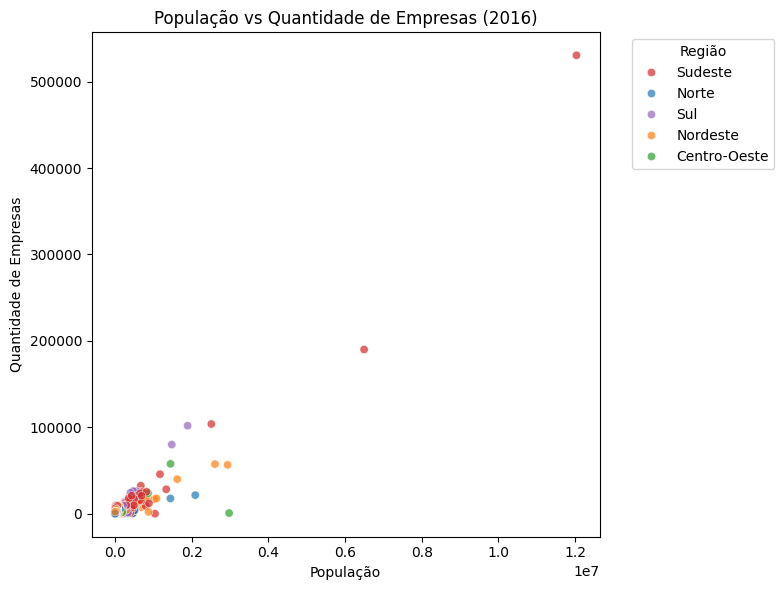

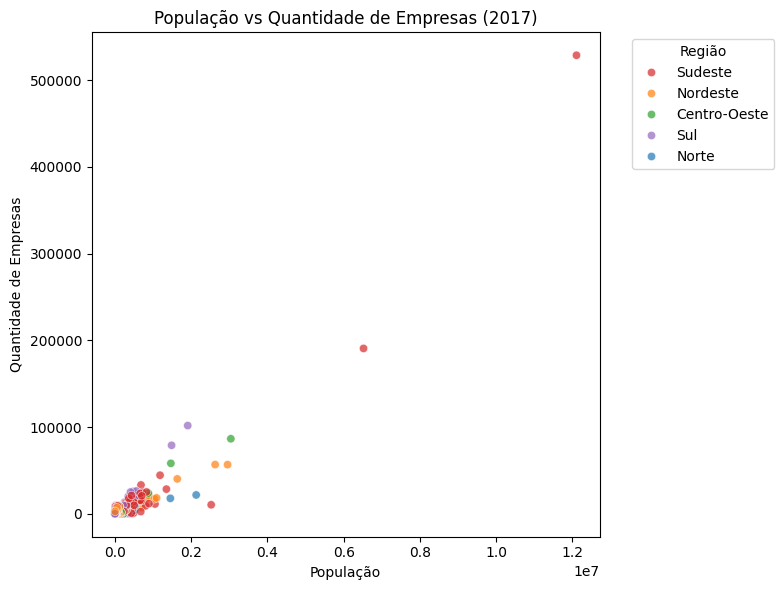

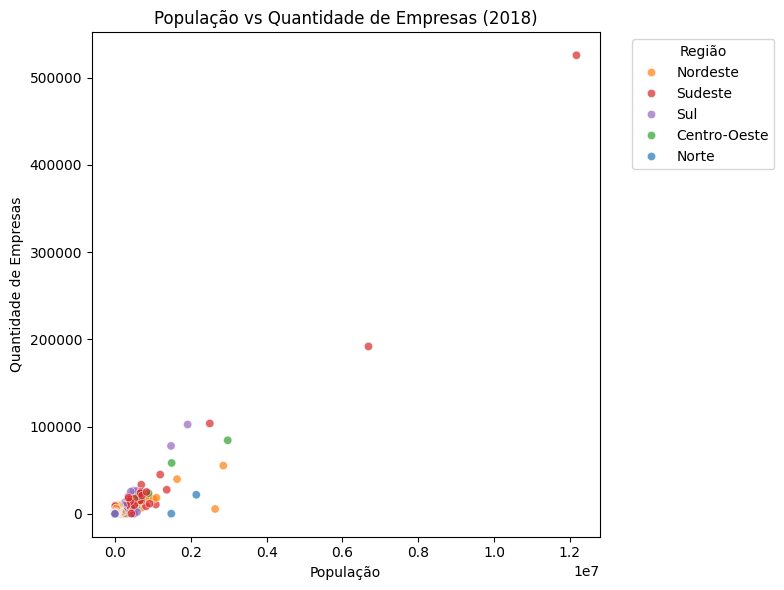

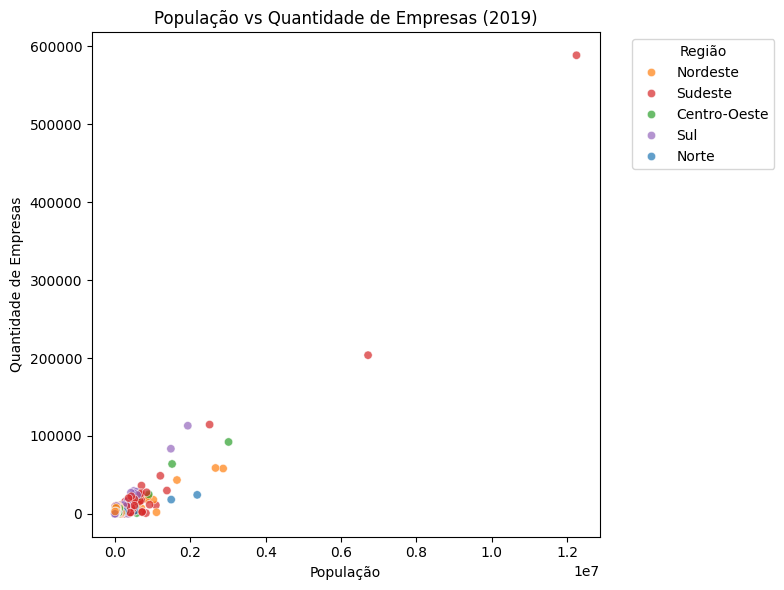

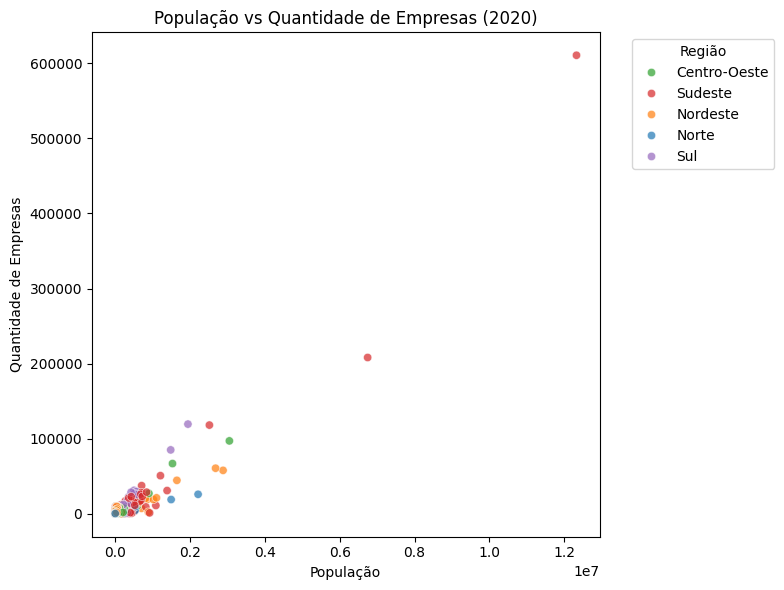

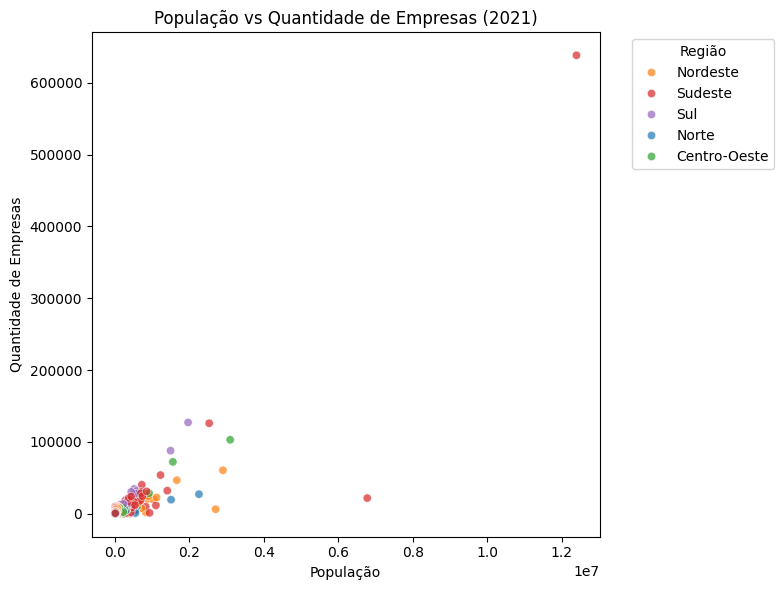

In [11]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    plt.figure(figsize=(8, 6))
    df_ano = df_br[df_br['Ano'] == ano]
    sns.scatterplot(
        data=df_ano,
        x='Populacao',
        y='QtEmpresas',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.7
    )
    plt.title(f'População vs Quantidade de Empresas ({ano})')
    plt.xlabel('População')
    plt.ylabel('Quantidade de Empresas')
    plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

###2. PIB médio por Região ao longo dos anos
<p> Relaciona a média do PIB das cinco regiões brasileiras ao longo dos anos (2016 - 2020)

Não há valores para o PIB de 2021, então removemos o ano do gráfico.

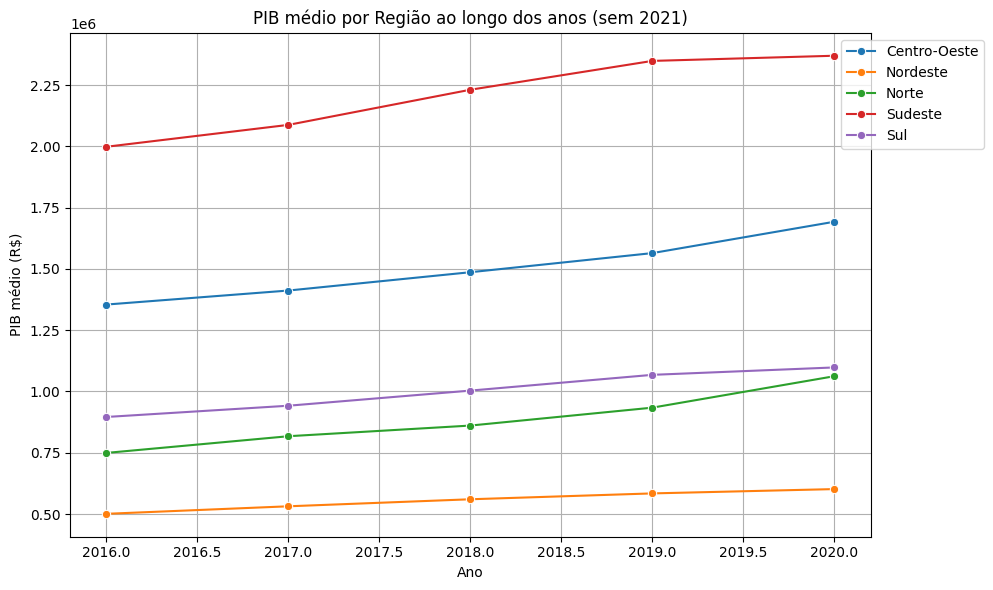

In [12]:
plt.figure(figsize=(10,6))
pib_por_regiao = df_br.groupby(['Ano', 'Regiao'])['PIB'].mean().reset_index()
pib_por_regiao = pib_por_regiao[pib_por_regiao['Ano'] != 2021]
sns.lineplot(data=pib_por_regiao, x='Ano', y='PIB', hue='Regiao', marker='o')
plt.title('PIB médio por Região ao longo dos anos (sem 2021)')
plt.ylabel('PIB médio (R$)')
plt.xlabel('Ano')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

###3. Relação entre Salários e Pessoal Assalariado
<p> Para todos os municípios de todas regiões, relaciona a quantidade de pessoas assalariadas com o valor dos salários oferecidos.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

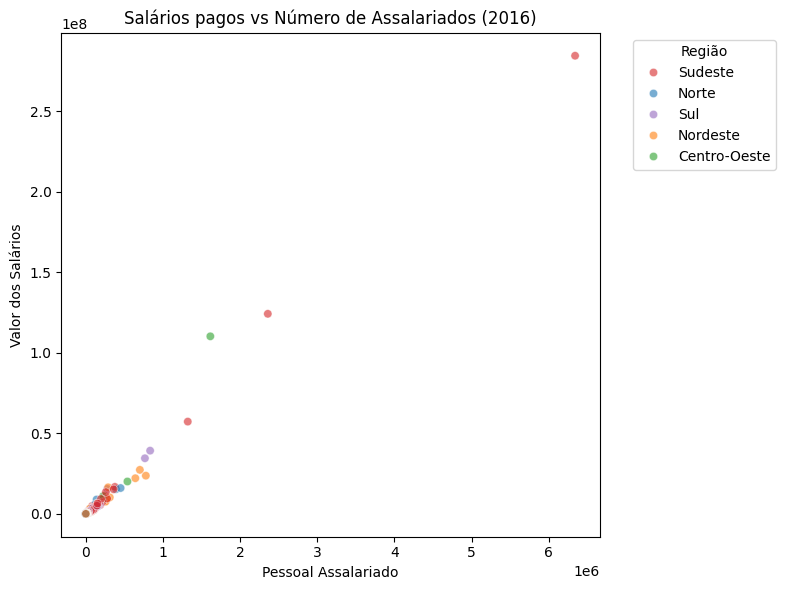

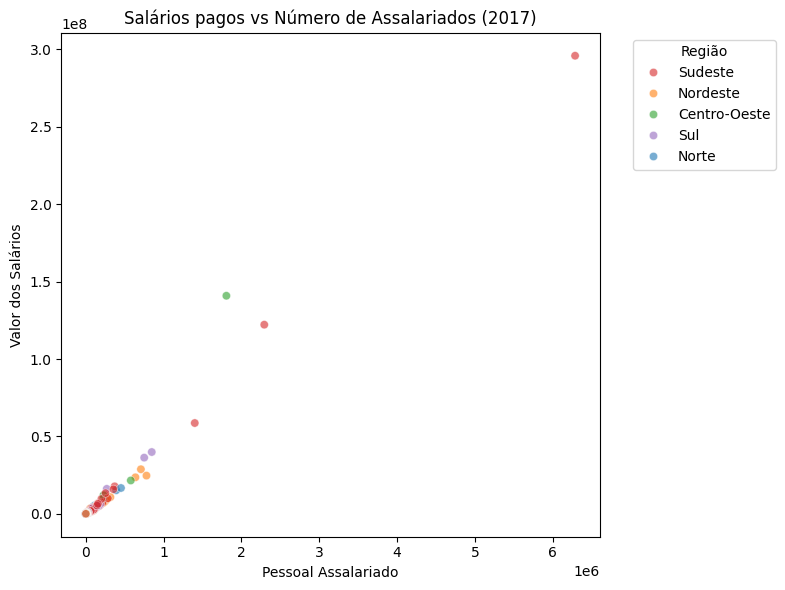

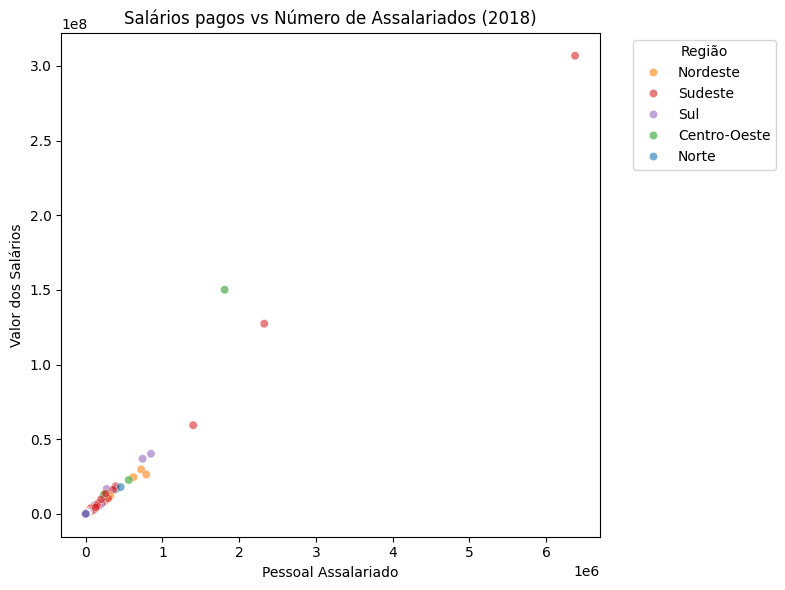

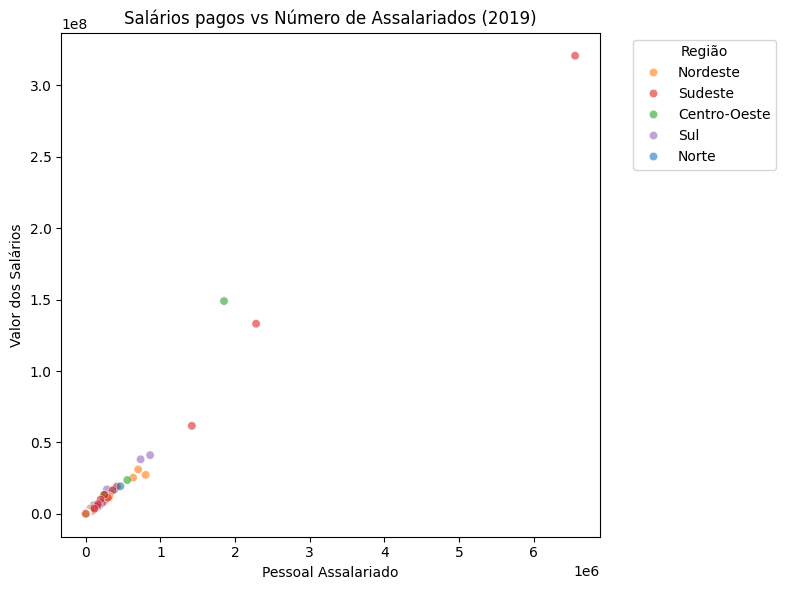

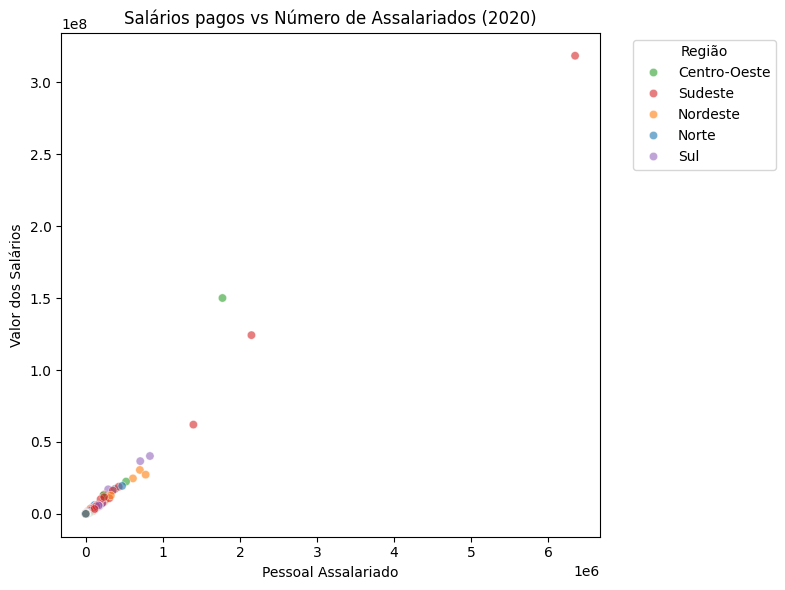

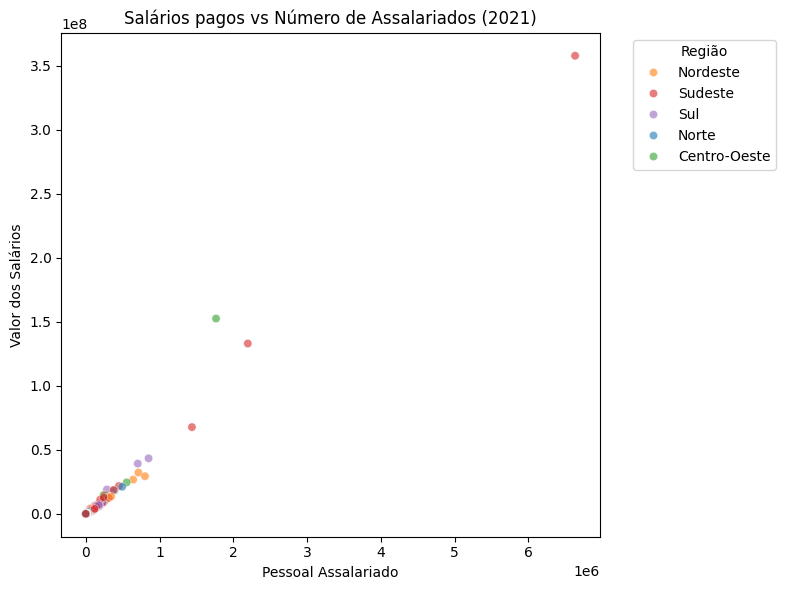

In [13]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    plt.figure(figsize=(8, 6))
    df_ano = df_br[df_br['Ano'] == ano]
    sns.scatterplot(
        data=df_ano,
        x='PessoalAssalariado',
        y='VrSalarios',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.6
    )
    plt.title(f'Salários pagos vs Número de Assalariados ({ano})')
    plt.xlabel('Pessoal Assalariado')
    plt.ylabel('Valor dos Salários')
    plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

 ### 4. Área Plantada vs. Área Colhida
 <p> Relaciona o total de área plantada com o total de área colhida de cada município de cada região.
 <p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

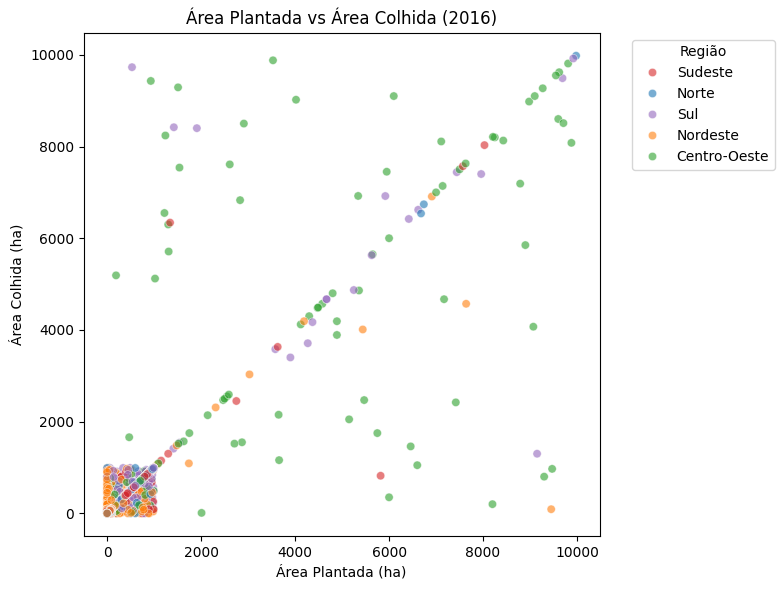

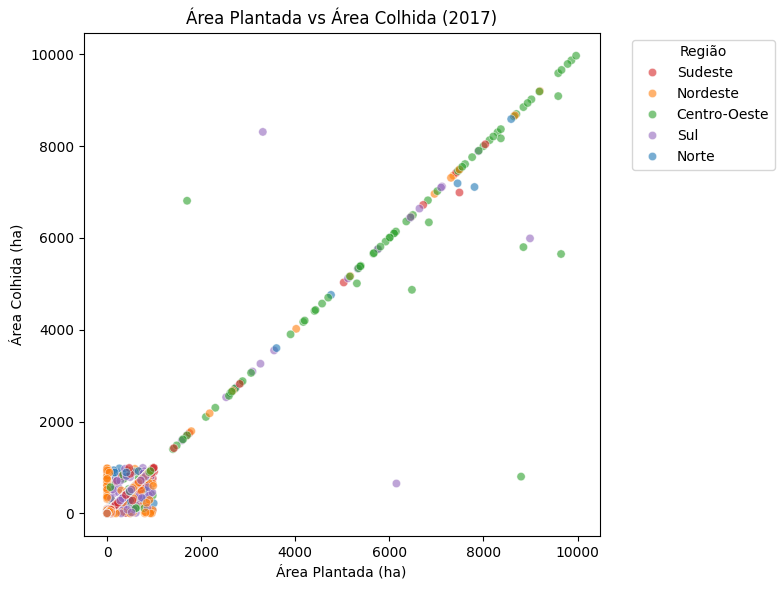

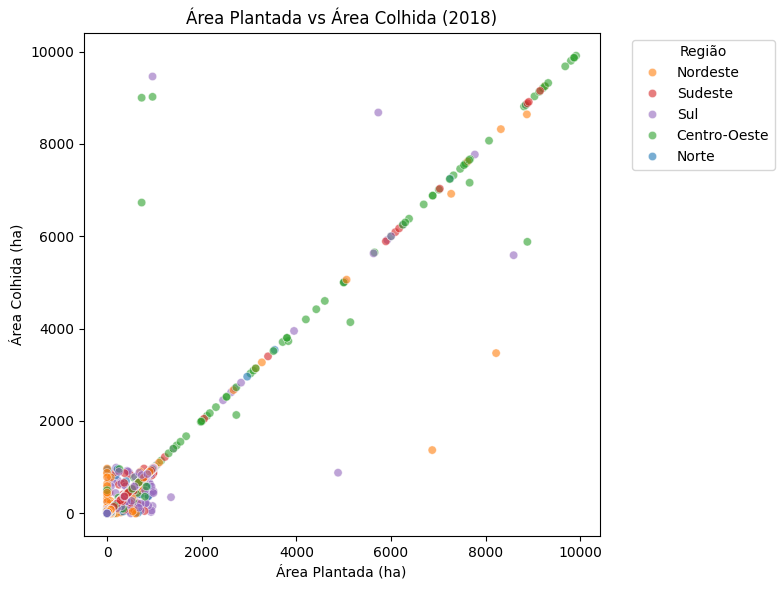

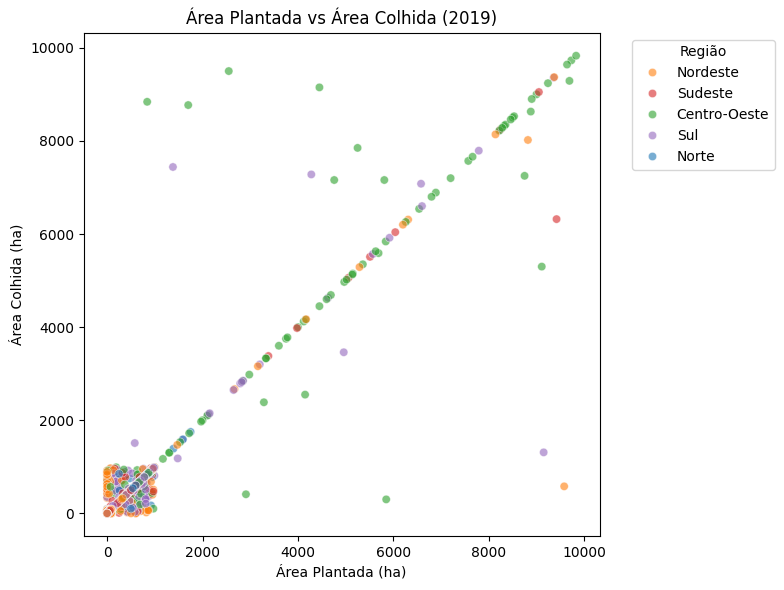

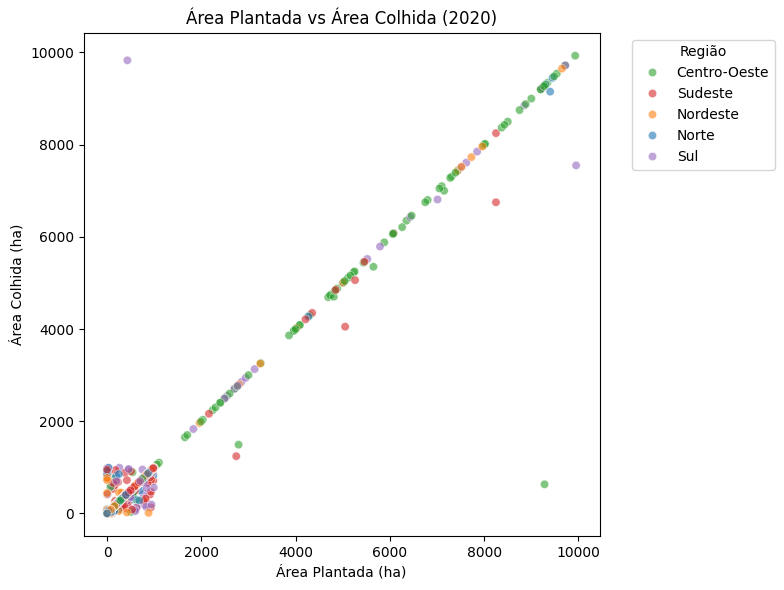

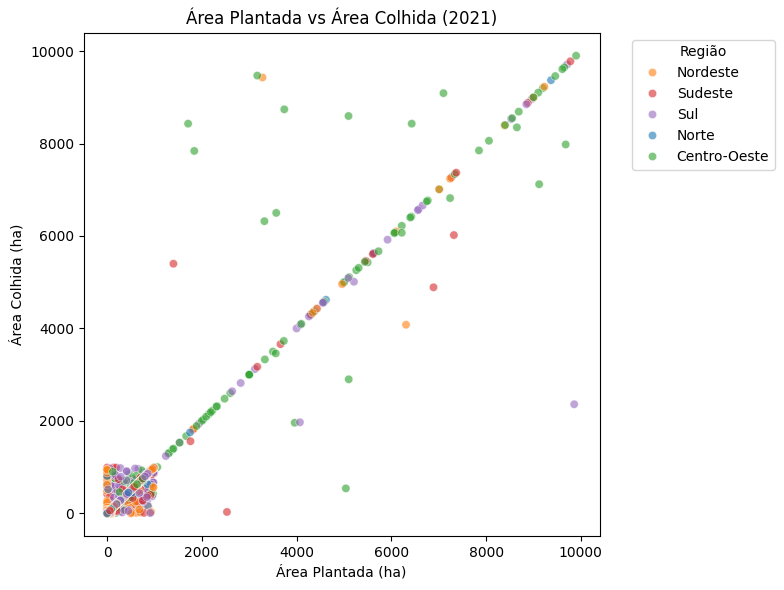

In [14]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    plt.figure(figsize=(8, 6))
    df_ano = df_br[df_br['Ano'] == ano]
    sns.scatterplot(
        data=df_ano,
        x='AreaPlantada_h',
        y='AreaColhida_h',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.6
    )
    plt.title(f'Área Plantada vs Área Colhida ({ano})')
    plt.xlabel('Área Plantada (ha)')
    plt.ylabel('Área Colhida (ha)')
    plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

###5. Produção Agrícola vs. Pecuária
<p> Faz um comparativo entre a produção agrícola e a produção pecuária para todos os municípios de todas as regiões.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

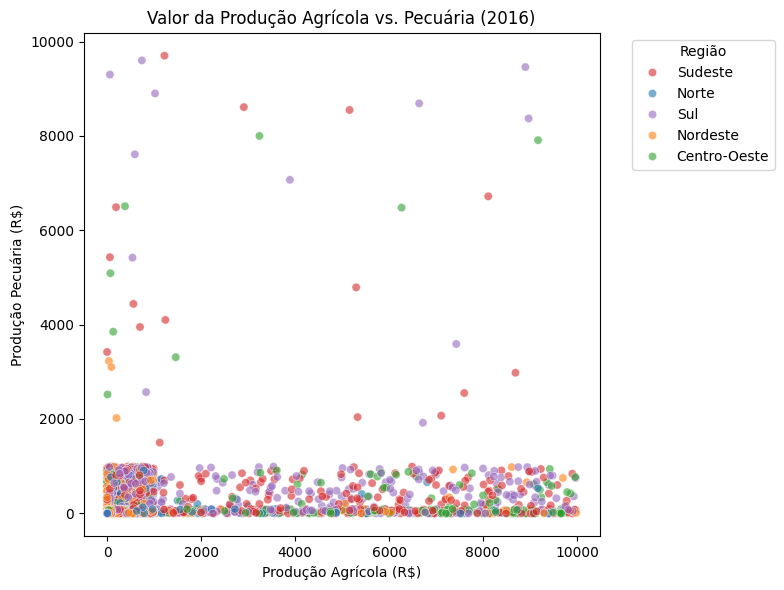

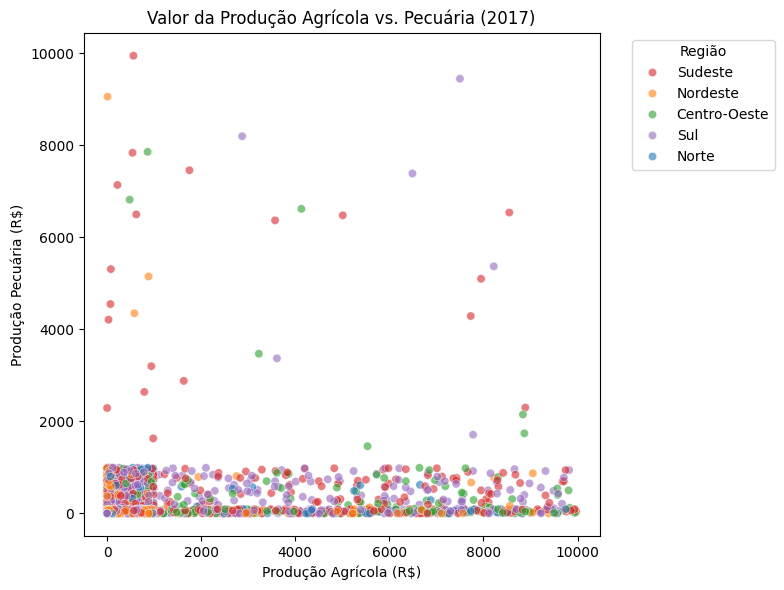

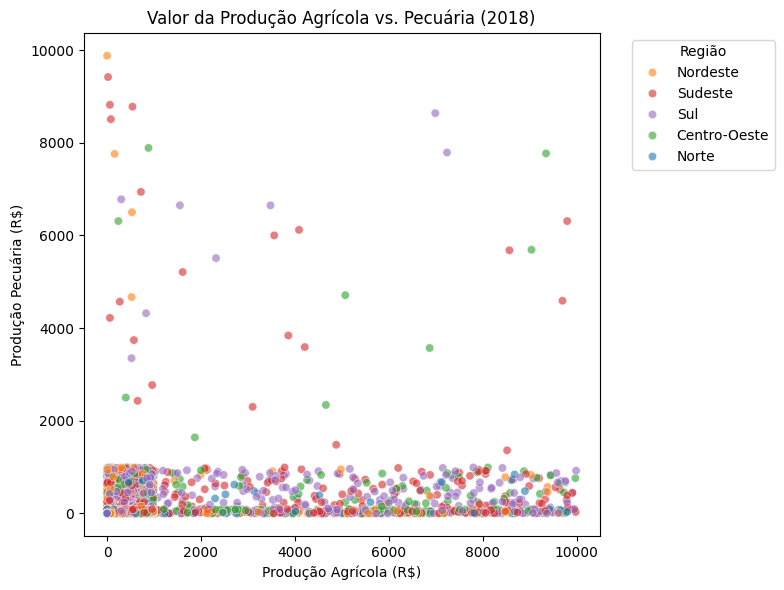

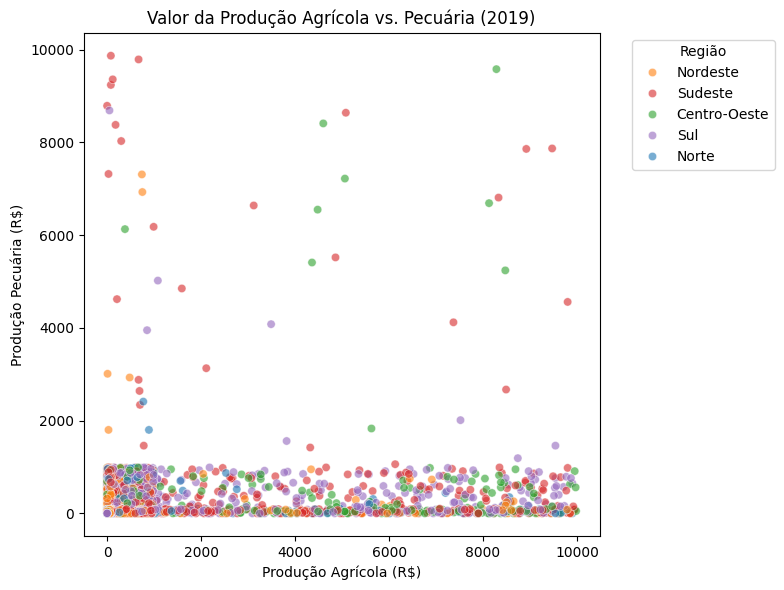

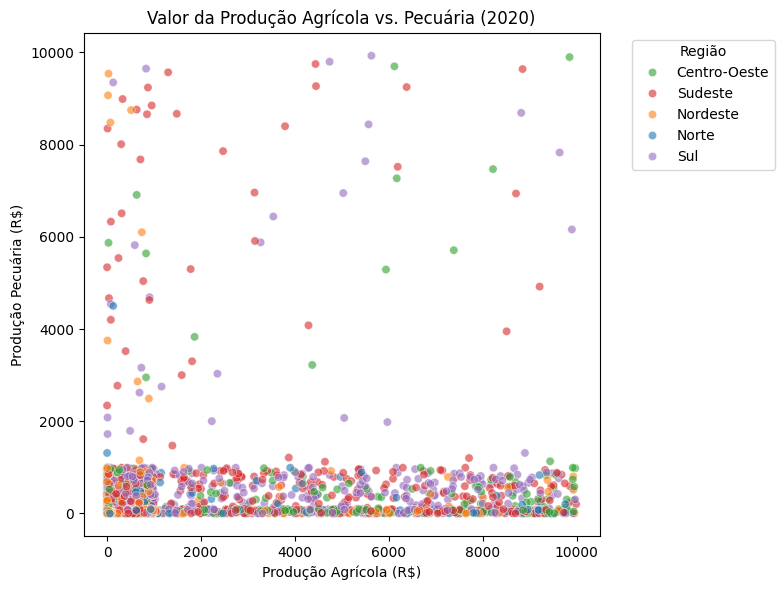

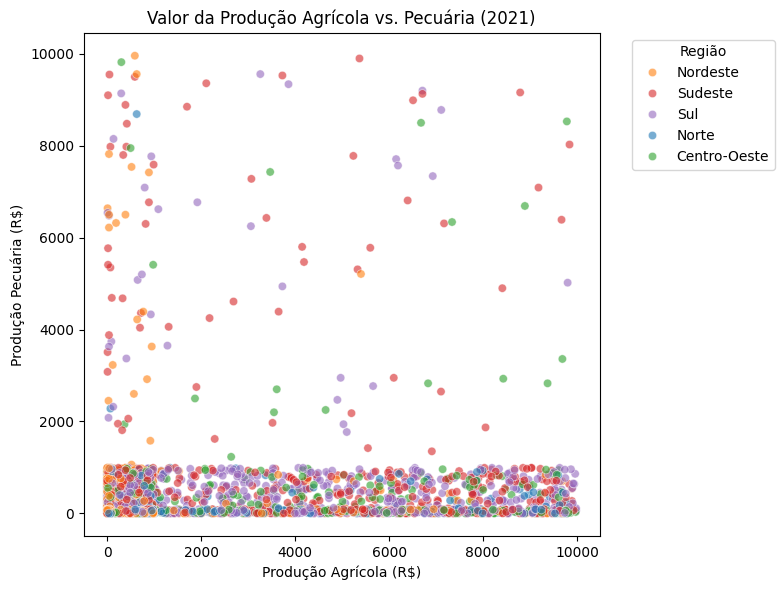

In [15]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    plt.figure(figsize=(8, 6))
    df_ano = df_br[df_br['Ano'] == ano]
    sns.scatterplot(
        data=df_ano,
        x='VlProducaoAgricola',
        y='VlProducaoPecuaria',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.6
    )
    plt.title(f'Valor da Produção Agrícola vs. Pecuária ({ano})')
    plt.xlabel('Produção Agrícola (R$)')
    plt.ylabel('Produção Pecuária (R$)')
    plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

###6. Exportações e Importações por Região (média anual)
<p> Faz uma média das importações e importações anuais para cada uma das cinco regiões do país.

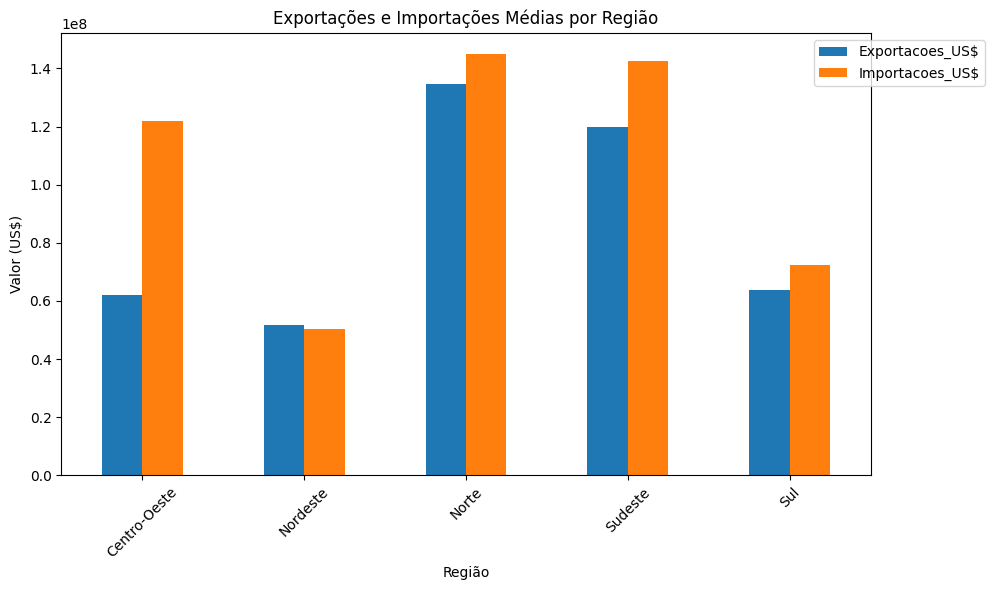

In [16]:
exp_imp = df_br.groupby('Regiao')[['Exportacoes_US$', 'Importacoes_US$']].mean().reset_index()
exp_imp.plot(x='Regiao', kind='bar', figsize=(10,6))
plt.title('Exportações e Importações Médias por Região')
plt.ylabel('Valor (US$)')
plt.xlabel('Região')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###7. Nascimentos vs. Óbitos Infantis
<p> Relaciona a quantidade de nascimentos com a mortalidade infantil de cada município de cada região.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

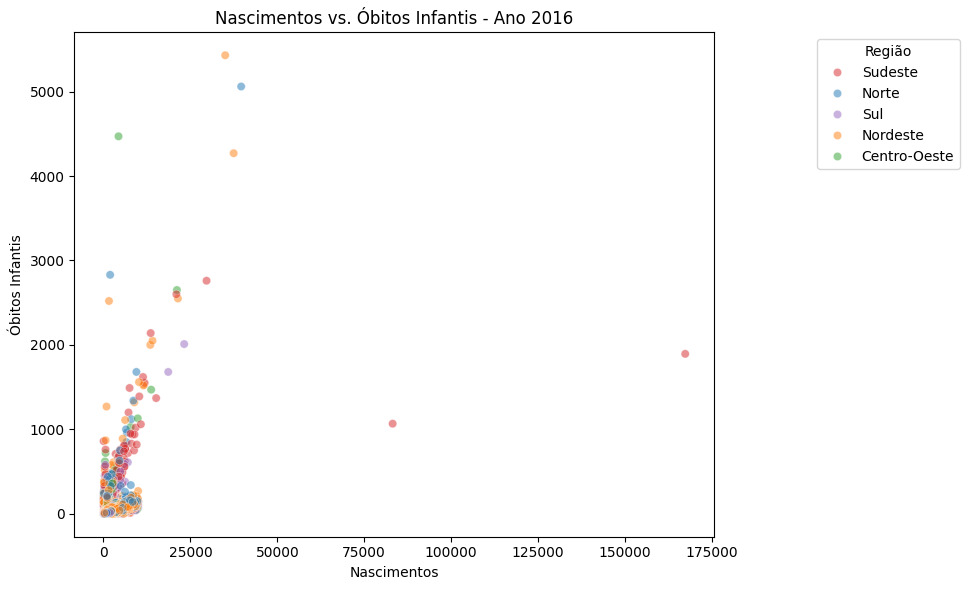

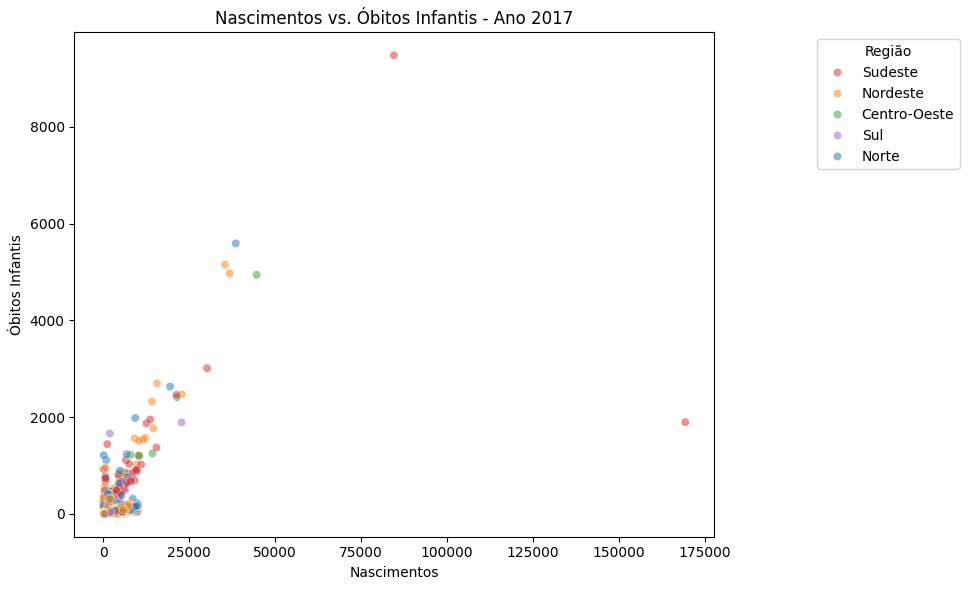

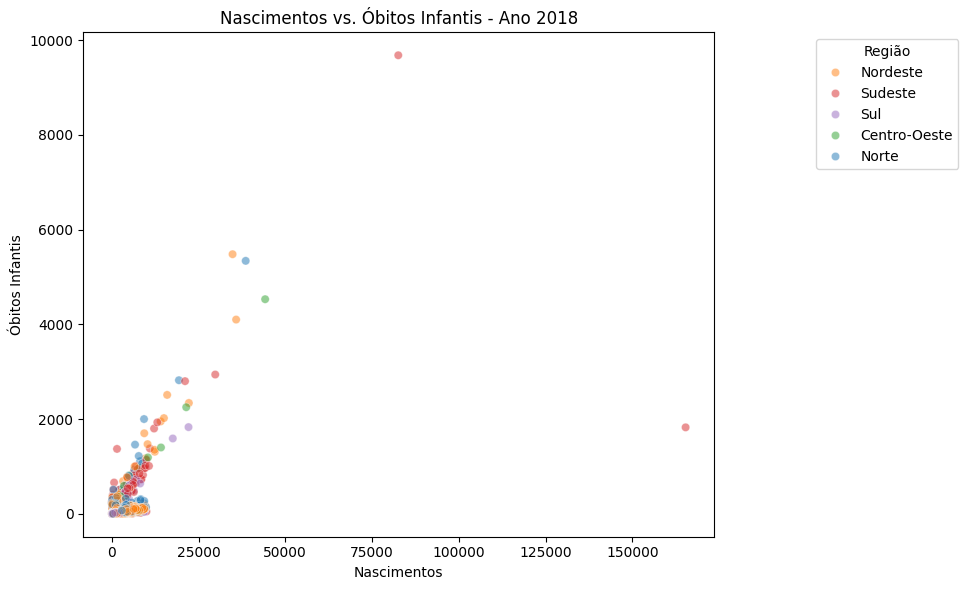

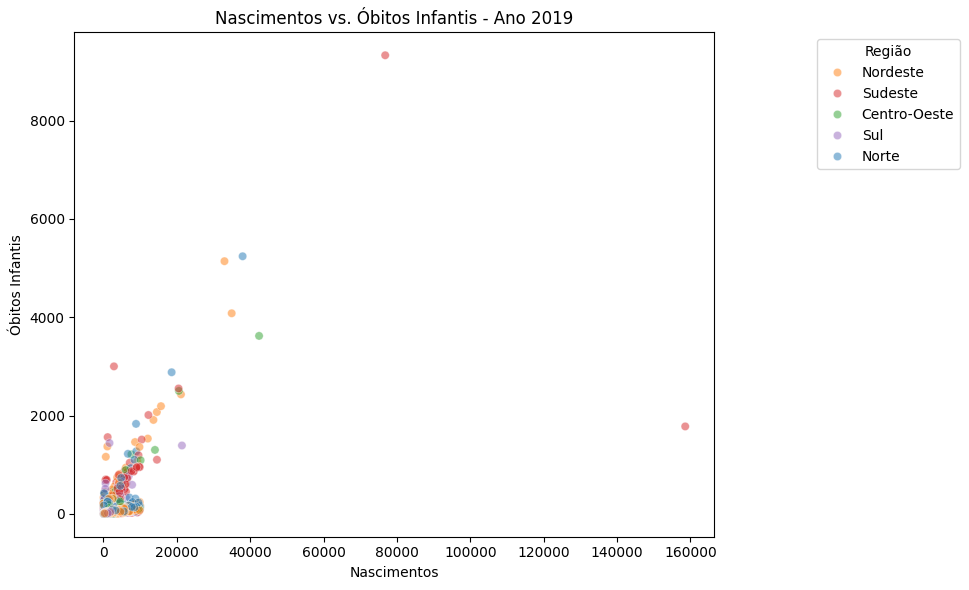

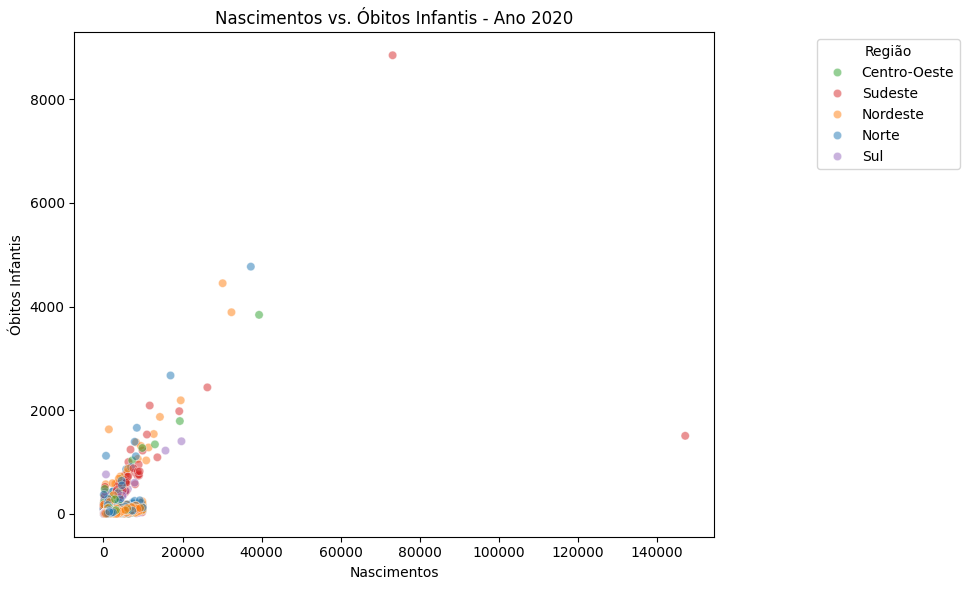

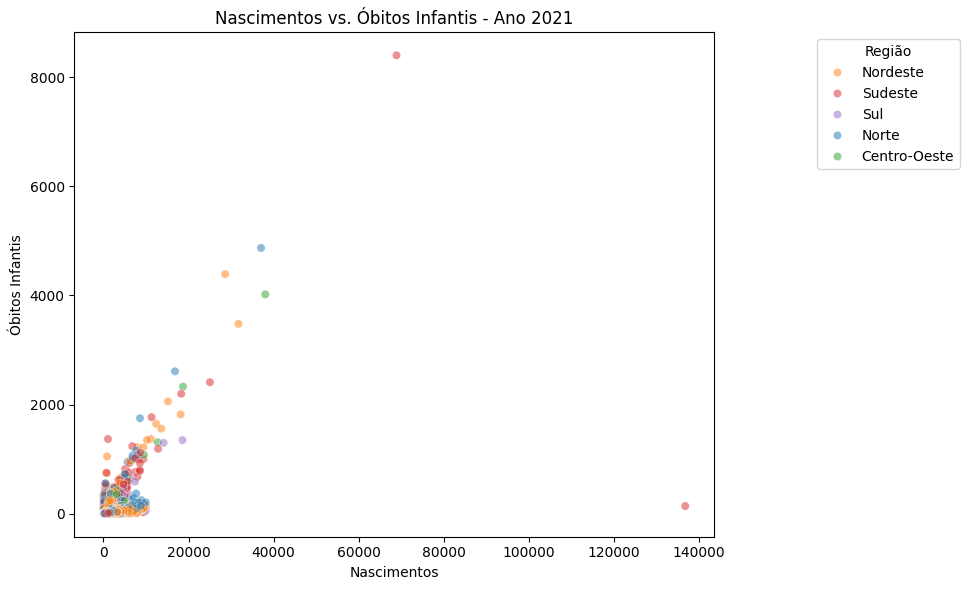

In [17]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    df_ano = df_br[df_br['Ano'] == ano]
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df_ano,
        x='NrNascimentos',
        y='NrObitosInfantis',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.5
    )
    plt.title(f'Nascimentos vs. Óbitos Infantis - Ano {ano}')
    plt.xlabel('Nascimentos')
    plt.ylabel('Óbitos Infantis')
    plt.legend(title='Região', bbox_to_anchor=(1.15, 1.0), loc='upper left')
    plt.tight_layout()
    plt.show()

##Dados relacionados à pandemia do Covid-19 - BrStats

###1. Queda no número de empresas
Objetivo: Ver se houve redução no número de empresas ativas.

Gráfico de linha com o eixo X sendo o ano e Y sendo a QtEmpresas.

Uma linha para cada região.

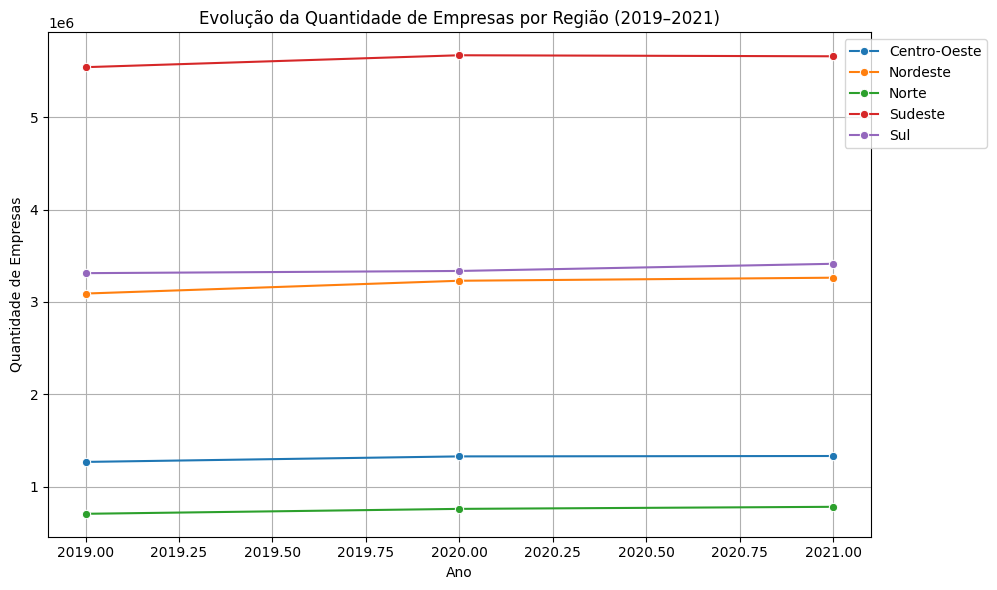

In [18]:
df_emp = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_emp.groupby(['Ano', 'Regiao'])['QtEmpresas'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_group, x='Ano', y='QtEmpresas', hue='Regiao', marker='o')
plt.title('Evolução da Quantidade de Empresas por Região (2019–2021)')
plt.ylabel('Quantidade de Empresas')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

###2. PIB por região ao longo dos anos
Objetivo: Analisar o impacto direto no Produto Interno Bruto.

Gráfico de linha do PIB por região, 2019–2020.

Não há valores para o PIB no ano de 2021, então removemos o ano do gráfico.


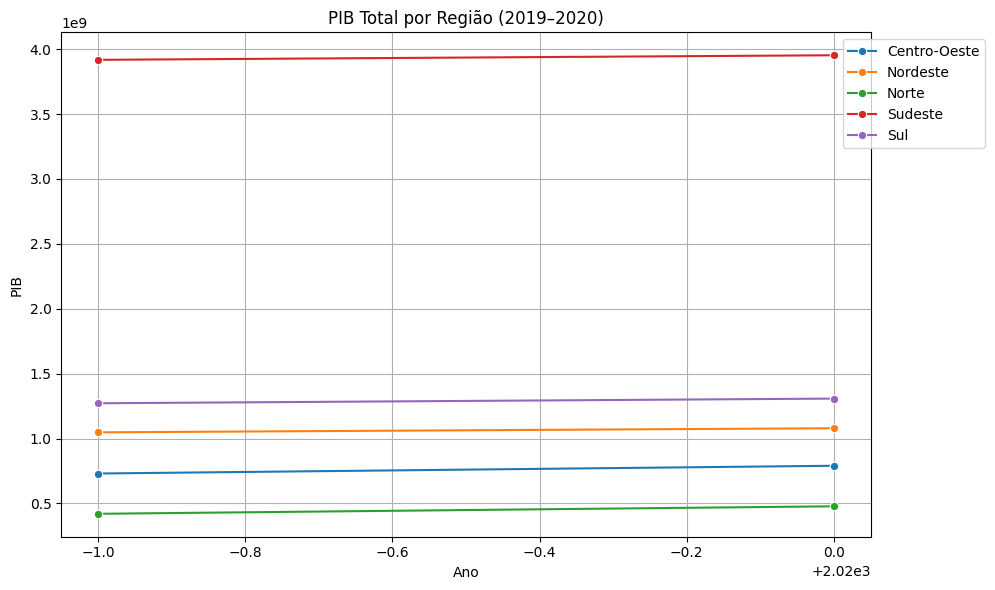

In [19]:
df_pib = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_pib.groupby(['Ano', 'Regiao'])['PIB'].sum().reset_index()
df_group = df_group[df_group['Ano'] != 2021]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_group, x='Ano', y='PIB', hue='Regiao', marker='o')
plt.title('PIB Total por Região (2019–2020)')
plt.ylabel('PIB')
plt.xlabel('Ano')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

###3. Impacto no emprego
Objetivo: Ver efeitos no mercado de trabalho.

Gráfico de barras para:

*   PessoalOcupado
*   PessoalAssalariado

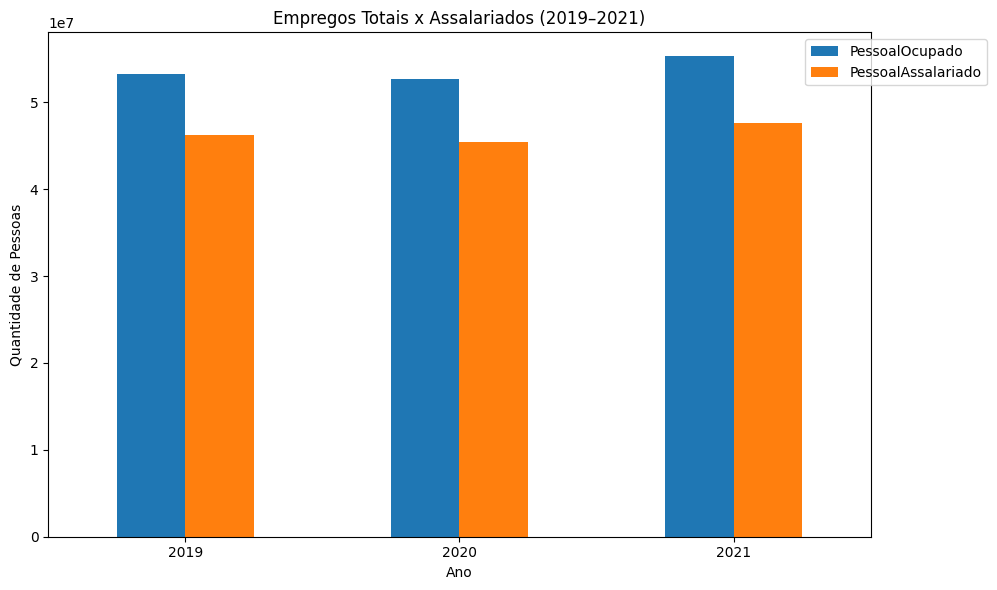

In [20]:
df_job = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_job.groupby('Ano')[['PessoalOcupado', 'PessoalAssalariado']].sum().reset_index()
df_group.plot(x='Ano', kind='bar', figsize=(10, 6))
plt.title('Empregos Totais x Assalariados (2019–2021)')
plt.ylabel('Quantidade de Pessoas')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###4. Nascimentos e Óbitos Infantis
Objetivo: Investigar impacto demográfico e no sistema de saúde.

Gráfico de linha para NrNascimentos e NrObitosInfantis por ano e região.

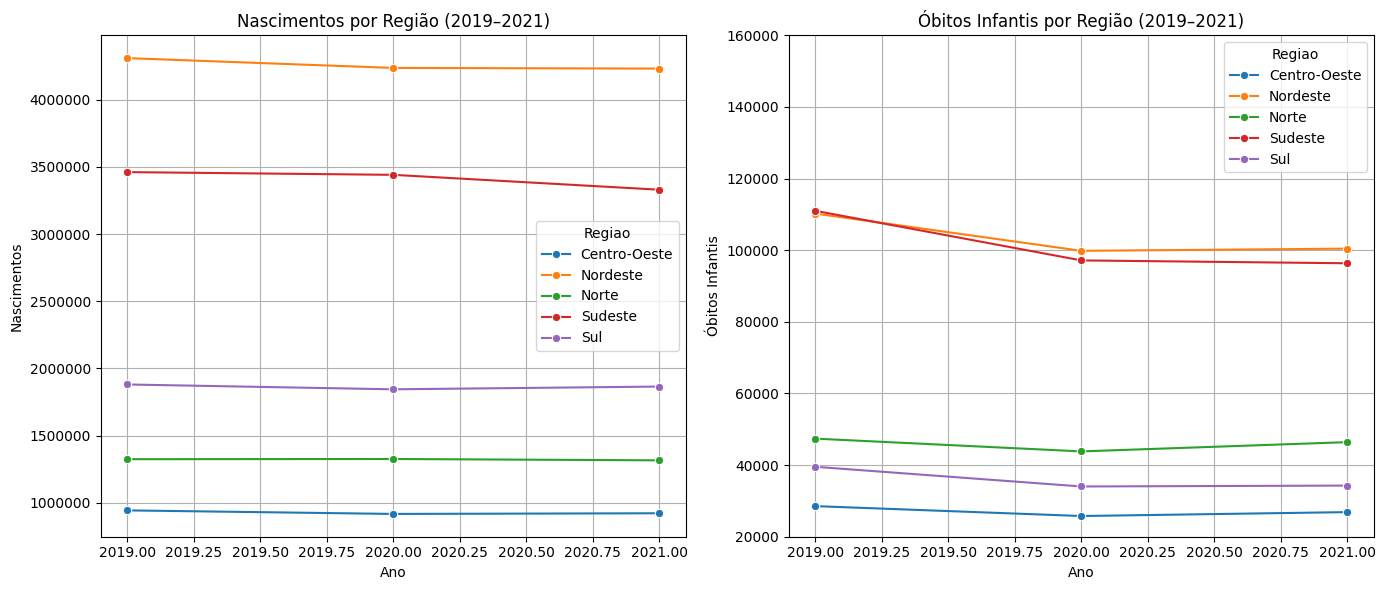

In [21]:
from matplotlib.ticker import FuncFormatter
def normal_notation(x, pos):
    return f'{x:.0f}'
df_nasc = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_nasc.groupby(['Ano', 'Regiao'])[['NrNascimentos', 'NrObitosInfantis']].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_group, x='Ano', y='NrNascimentos', hue='Regiao', marker='o')
plt.title('Nascimentos por Região (2019–2021)')
plt.ylabel('Nascimentos')
plt.xlabel('Ano')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(normal_notation))
plt.subplot(1, 2, 2)
sns.lineplot(data=df_group, x='Ano', y='NrObitosInfantis', hue='Regiao', marker='o')
plt.title('Óbitos Infantis por Região (2019–2021)')
plt.ylabel('Óbitos Infantis')
plt.xlabel('Ano')
plt.grid(True)
plt.ylim(20000, 160000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(normal_notation))
plt.tight_layout()
plt.show()

###5. Scatterplots comparando antes e depois de PIB vs QtEmpresas para 2019 vs 2020
Objetivo: Avaliar mudanças em relações econômicas para todos os municípios de todas as regiões.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

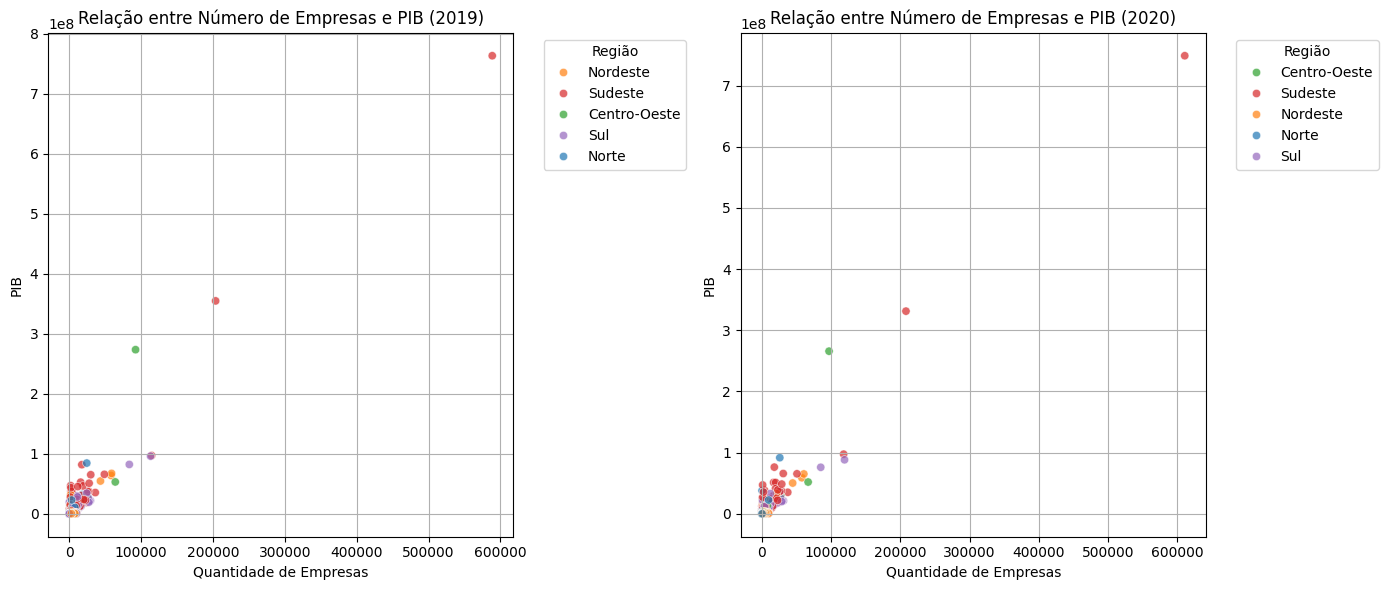

In [22]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
df_filtered = df_br[df_br['Ano'].isin([2019, 2020])]

plt.figure(figsize=(14, 6))

# Gráfico para 2019
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_filtered[df_filtered['Ano'] == 2019], x='QtEmpresas', y='PIB', hue='Regiao',
                palette=palette_regioes, alpha=0.7)
plt.title('Relação entre Número de Empresas e PIB (2019)')
plt.xlabel('Quantidade de Empresas')
plt.ylabel('PIB')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico para 2020
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_filtered[df_filtered['Ano'] == 2020], x='QtEmpresas', y='PIB', hue='Regiao',
                palette=palette_regioes, alpha=0.7)
plt.title('Relação entre Número de Empresas e PIB (2020)')
plt.xlabel('Quantidade de Empresas')
plt.ylabel('PIB')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

###6. Boxplot da razão entre Receita e Transferência
Objetivo: Identificar autossuficiência fiscal antes e durante a pandemia.

Razão: Receitas_R$ / (Transferencias_correntes_R$ + Transferencias_capital_R$)

Boxplot por região, em 2019 vs 2020/2021

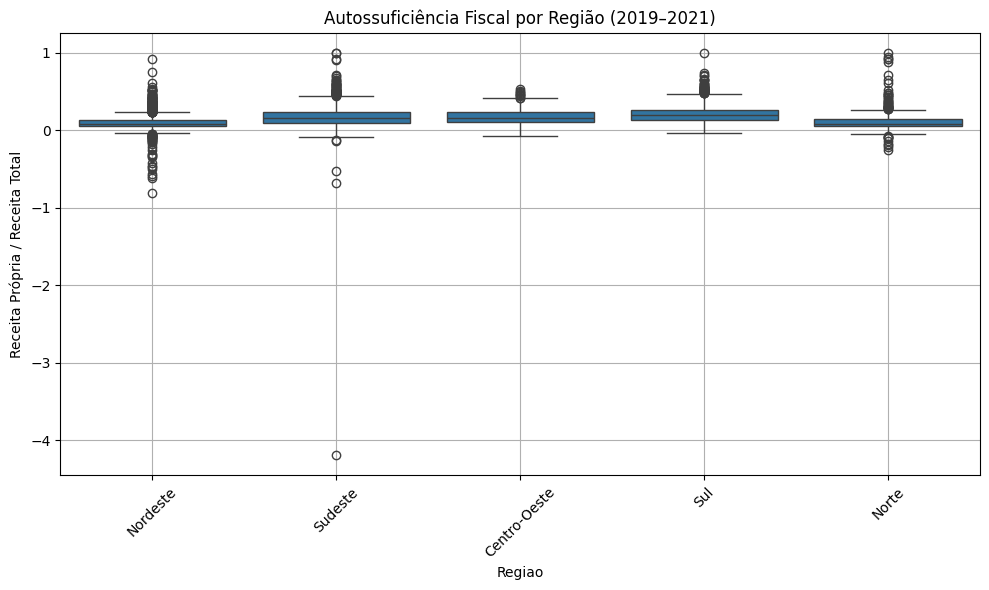

In [23]:
df_ratio = df_br.copy()
df_ratio['ReceitaPropria'] = df_ratio['Receitas_R$'] - df_ratio['Transferencias_correntes_R$'] - df_ratio['Transferencias_capital_R$']
df_ratio = df_ratio[df_ratio['Ano'].between(2019, 2021)]
df_ratio['Razao'] = df_ratio['ReceitaPropria'] / (df_ratio['Receitas_R$'] + 1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ratio, x='Regiao', y='Razao')
plt.title('Autossuficiência Fiscal por Região (2019–2021)')
plt.ylabel('Receita Própria / Receita Total')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Importação dos Dados sobre a COVID-19 - DataSUS


<p>Nessa subseção faremos a importação e também compreenção dos dados que obtivemos sobre a pandemia de COVID 19 que afetou o Brasil e o mundo entre 2020 e 2023.
<p>O primeiro caso da doença no Brasil foi registrada no dia 25 de Fevereiro de 2020, na cidade de São Paulo. Desde então, o Ministério da Saúde realizou o monitoramento diário do avanço da pandemia em terras tupiniquins.
<p>Utilizando por base o Ministério da Saúde, o Brasil.IO e o perfil @coronavirusbra1, este levantamento realizado pelo Departamento de Física da Universidade Federal de Viçosa, liderado pelo Professor Wesley Cota, apresenta dados desde a 9ª até a 311ª semana da pandemia no Brasil.
<p>A seguir faremos a importação desses dados, nomeados como 'casos_2020.csv', 'casos_2021.csv', 'casos_2022.csv' e 'casos_2023.csv'.

In [24]:
df_2020 = pd.read_csv('casos_2020.csv', low_memory=False)
print(f"Casos 2020: {df_2020.shape[0]} linhas, {df_2020.shape[1]} colunas")

Casos 2020: 1314380 linhas, 12 colunas


In [25]:
df_2021 = pd.read_csv('casos_2021.csv', low_memory=False)
print(f"Casos 2021: {df_2021.shape[0]} linhas, {df_2021.shape[1]} colunas")

Casos 2021: 2042733 linhas, 12 colunas


In [26]:
df_2022 = pd.read_csv('casos_2022.csv', low_memory=False)
print(f"Casos 2022: {df_2022.shape[0]} linhas, {df_2022.shape[1]} colunas")

Casos 2022: 2042905 linhas, 12 colunas


In [27]:
df_2023 = pd.read_csv('casos_2023.csv', low_memory=False)
print(f"Casos 2023: {df_2023.shape[0]} linhas, {df_2023.shape[1]} colunas")

Casos 2023: 430969 linhas, 12 colunas


### Descrição dos Dados - casos_2020 a 2023

Como é possível observar pela execução dos trechos de código que antecedem essa subseção, os códigos foram formatados como esperado, não necessitando uma conversão como para o DataSet anterior.

| Coluna                         | Descrição                                                                                                          |
|--------------------------------|--------------------------------------------------------------------------------------------------------------------|
| date                           | Data do registro, no formato YYYY-MM-DD.                                                                           |
| country                        | País dos dados, que é sempre "Brazil".                                                                             |
| state                          | Sigla da unidade federativa (UF) ou "TOTAL" quando se refere ao país inteiro.                                      |
| city                           | Nome completo do município no formato "Cidade/UF". Pode ser "CASO SEM LOCALIZACAO DEFINIDA/UF".                  |
| ibgeID                         | ID único do município fornecido pelo Instituto Brasileiro de Geografia e Estatística (IBGE).                      |
| newDeaths                      | Diferença entre o número de óbitos da data correspondente e o dia anterior.                                        |
| deaths                         | Número acumulado de óbitos até aquela data.                                                                        |
| newCases                       | Diferença entre o número de casos da data correspondente e o dia anterior.                                         |
| totalCases                     | Número acumulado de casos até aquela data.                                                                         |
| deaths_per_100k_inhabitants   | Número de óbitos por 100.000 habitantes naquela localidade.                                                        |
| totalCases_per_100k_inhabitants | Número de casos por 100.000 habitantes naquela localidade.                                                        |
| deaths_by_totalCases           | Proporção entre o número de óbitos e o número total de casos.                                                      |


####Resumo dos Dados


In [28]:
def gerar_resumo(df):
    desc_numericas = df.describe().T
    nulos = df.isnull().sum()
    tipos = df.dtypes
    valores_unicos = df.nunique()

    resumo = pd.DataFrame({
        'Tipo': tipos,
        'Nulos': nulos,
        'Valores únicos': valores_unicos,
        'Mínimo': desc_numericas['min'],
        'Máximo': desc_numericas['max'],
        'Média': desc_numericas['mean'],
        'Mediana': df.median(numeric_only=True)
    })

    resumo = resumo.fillna("-")
    return resumo

In [29]:
resumo_2020 = gerar_resumo(df_2020)
print(resumo_2020.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo   | Máximo    | Média               | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:---------|:----------|:--------------------|:----------|
| city                            | object  |       0 |             5596 | -        | -         | -                   | -         |
| date                            | object  |       0 |              311 | -        | -         | -                   | -         |
| deaths                          | int64   |       0 |             3102 | 0.0      | 195008.0  | 41.23855201692052   | 2.0       |
| deaths_by_totalCases            | float64 |       0 |              354 | 0.0      | 1.1       | 0.03249711042468694 | 0.016     |
| deaths_per_100k_inhabitants     | float64 |       0 |            56887 | 0.0      | 401.606   | 28.60326229553098   | 17.036    |
| epi_week                        | int64   |       0 |               45 | 9

In [30]:
resumo_2021 = gerar_resumo(df_2021)
print(resumo_2021.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo    | Máximo     | Média                | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:----------|:-----------|:---------------------|:----------|
| city                            | object  |       0 |             5597 | -         | -          | -                    | -         |
| date                            | object  |       0 |              365 | -         | -          | -                    | -         |
| deaths                          | int64   |       0 |             6570 | 0.0       | 619079.0   | 165.96128324161796   | 15.0      |
| deaths_by_totalCases            | float64 |       0 |              293 | 0.0       | 4.0        | 0.023338368254686253 | 0.02      |
| deaths_per_100k_inhabitants     | float64 |       0 |           128438 | 0.0       | 1739.13    | 161.91651551328536   | 139.424   |
| epi_week                        | int64   |       0 |

In [31]:
resumo_2022 = gerar_resumo(df_2022)
print(resumo_2022.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo   | Máximo      | Média               | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:---------|:------------|:--------------------|:----------|
| city                            | object  |       0 |             5597 | -        | -           | -                   | -         |
| date                            | object  |       0 |              365 | -        | -           | -                   | -         |
| deaths                          | int64   |       0 |             6571 | 0.0      | 693853.0    | 238.94806464324088  | 24.0      |
| deaths_by_totalCases            | float64 |       0 |              201 | 0.0      | 7.788       | 0.01869697465129314 | 0.016     |
| deaths_per_100k_inhabitants     | float64 |       0 |            45129 | 0.0      | 15608.136   | 244.42852886698105  | 224.581   |
| epi_week                        | int64   |       0 |       

In [32]:
resumo_2023 = gerar_resumo(df_2023)
print(resumo_2023.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo    | Máximo      | Média                | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:----------|:------------|:---------------------|:----------|
| city                            | object  |       0 |             5597 | -         | -           | -                    | -         |
| date                            | object  |       0 |               77 | -         | -           | -                    | -         |
| deaths                          | int64   |       0 |             1899 | -258.0    | 699310.0    | 249.17804760899276   | 25.0      |
| deaths_by_totalCases            | float64 |       0 |              124 | 0.0       | 0.312       | 0.01697525344050269  | 0.014     |
| deaths_per_100k_inhabitants     | float64 |       0 |             9957 | -0.695    | 31963.338   | 257.23543007965765   | 236.586   |
| epi_week                        | int64   |   

### Criação de Novos Conjuntos de Dados

<p>Visando ter apenas os valores totais da pandemia para cada ano, realizamos uma limpeza dos dados, criando novos conjuntos de dados com estes.
<p>Esses novos DataSets serão utilizados nas análises ao longo do projeto.
<p>Como os dados são cumulativos, o código obtém o maior número relacionado a cada cidade e, em sequência, cria o conjunto 'df_ano_max.csv'.

In [33]:
#filtragem das cidades não nulas
df_2020 = df_2020[df_2020['city'].notna()]
df_2021 = df_2021[df_2021['city'].notna()]
df_2022 = df_2022[df_2022['city'].notna()]
df_2023 = df_2023[df_2023['city'].notna()]

df_2020_max = df_2020.groupby('city')[['deaths', 'totalCases', 'deaths_by_totalCases']].max().reset_index()
df_2021_max = df_2021.groupby('city')[['deaths', 'totalCases', 'deaths_by_totalCases']].max().reset_index()
df_2022_max = df_2022.groupby('city')[['deaths', 'totalCases', 'deaths_by_totalCases']].max().reset_index()
df_2023_max = df_2023.groupby('city')[['deaths', 'totalCases', 'deaths_by_totalCases']].max().reset_index()

df_2020_max.to_csv('df_2020_max.csv', index=False)
df_2021_max.to_csv('df_2021_max.csv', index=False)
df_2022_max.to_csv('df_2022_max.csv', index=False)
df_2023_max.to_csv('df_2023_max.csv', index=False)

In [34]:
df_2020_max['ano'] = 2020
df_2021_max['ano'] = 2021
df_2022_max['ano'] = 2022
df_2023_max['ano'] = 2023

# Junta todos os DataFrames em um só
df_todos_max = pd.concat([df_2020_max, df_2021_max, df_2022_max, df_2023_max], ignore_index=True)

# Ordena por nome da cidade e ano
df_todos_max = df_todos_max.sort_values(by=['city', 'ano']).reset_index(drop=True)
df_todos_max = df_todos_max[['ano', 'city', 'deaths', 'totalCases', 'deaths_by_totalCases']]

df_todos_max.to_csv('df_todos_max.csv', index=False)

# Perguntas


<p>Nessa seção apresentaremos algumas perguntas que foram elaboradas pelo grupo e serão analisadas no decorrer do Projeto.
<p>Como explicitado na introdução, muitas dessas perguntas tentarão responder e encontrar uma correlação entre as características das cidades e o impacto que a pandemia de COVID-19 gerou nestas.
<p>Além das perguntas voltadas a esta temática, algumas outras serão apresentadas, que representam mais algumas curiosidades dos integrantes do grupo, como algumas envolvendo as cidades-natal destes (Caratinga, Itaúna, Pará de Minas e Ubá, todas de Minas Gerais).


1.   Quais cidades registraram os maiores números absolutos de óbitos infantis e as maiores razões de óbito/nascimento infantil durante a pandemia (2020-2021)?

2.   Qual foi a variação no número total de empresas entre o período pré-pandemia (2016-2019) e o período pandêmico (2020-2021)? Que conclusões podemos extrair dessa análise?

3.   Qual a soma dos maiores valores de produção agrícola por cidade no período pré-pandêmico (2016-2019) comparado ao período pandêmico (2020-2021)?

4.   Quais cidades apresentaram a menor eficiência agrícola (razão entre área colhida e área plantada) durante a pandemia (2020-2021) e como isso se compara ao período anterior (2016-2019)?

5.   Considerando as 10 cidades com maior produção pecuária no período pré-pandêmico, qual foi a variação na produção dessas cidades durante a pandemia?

6.  Como o crescimento do PIB dos municípios brasileiros entre 2018 e 2019 se comportou em relação a 2019 e 2020, início do período pandêmico?

7.   Existe correlação entre receitas municipais e indicadores de qualidade de vida, como mortalidade infantil?

8.   Há relação direta entre área plantada/colhida e valor total da produção agrícola?

9.   Municípios com maior volume de exportações apresentam melhores indicadores econômicos?

10.   Qual foi o impacto da pandemia nos fluxos de importação e exportação por região?

11.   Quais foram os valores extremos (máximos e mínimos) de PIB, importações e exportações nas cidades de Caratinga, Itaúna, Pará de Minas e Ubá durante a pandemia (2020-2021)?

12.   Como se comparam as taxas de letalidade (deaths_by_totalCases) nas cidades-natal dos integrantes do grupo em relação aos seus PIBs?

13.   Qual porcentagem da população foi infectada por COVID-19 anualmente nas cidades-natal dos integrantes?

14.   Qual a mortalidade por COVID-19 nas 10 cidades com maior e menor PIB? Existe correlação entre PIB e mortalidade?

#Resolução das Questões

##Pergunta 01

<ipython-input-35-f4d9f33f69be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandemia.loc[:, 'Razao_Obito_Nascimento'] = df_pandemia['NrObitosInfantis'] / df_pandemia['NrNascimentos']
<ipython-input-35-f4d9f33f69be>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_obitos_infantis, x='Municipio', y='NrObitosInfantis', palette='viridis')


Cidade com maior número absoluto de óbitos infantis:
Rio de Janeiro - Óbitos infantis: 8850

Cidade com maior razão óbito/nascimento infantil:
Santana - Razão óbito/nascimento: 15.9091


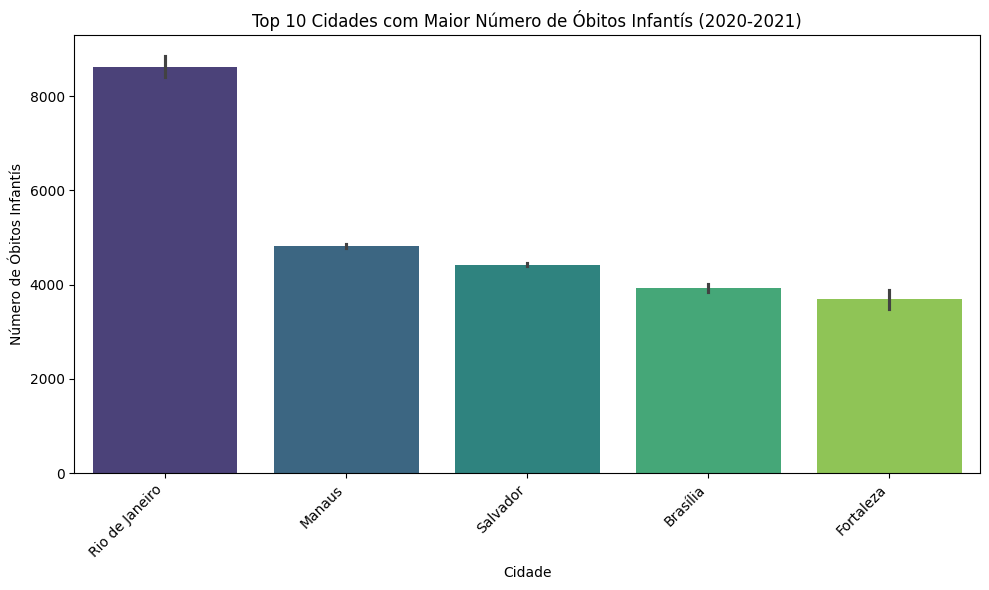

<ipython-input-35-f4d9f33f69be>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_razao_obito_nascimento, x='Municipio', y='Razao_Obito_Nascimento', palette='viridis')


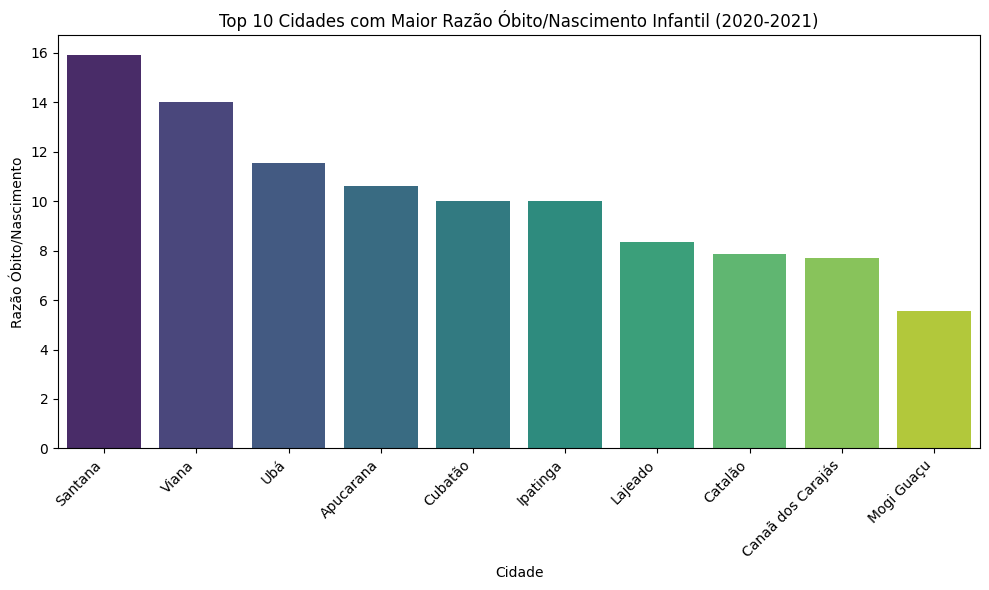

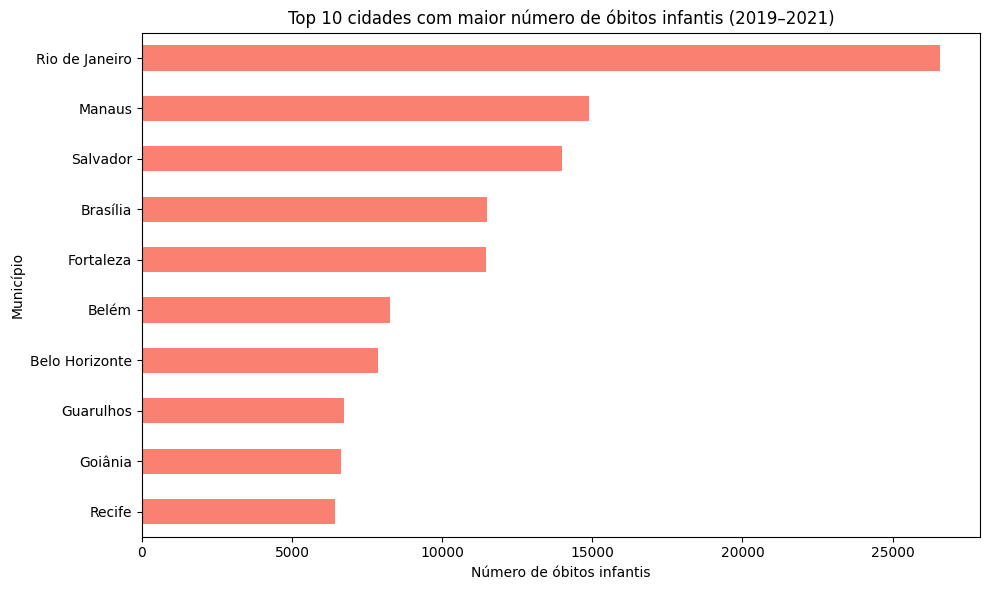

Text(0.5, 1.0, 'Distribuição da razão óbitos/nascimentos infantis')

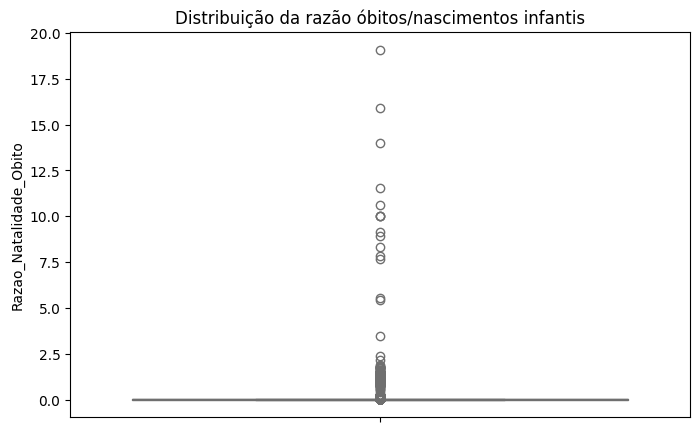

In [35]:
# Filtrando os dados para os anos de 2020 e 2021
df_pandemia = df_br[df_br['Ano'].isin([2020, 2021])]

# 1. Encontrando a cidade com maior número absoluto de óbitos infantis
cidade_maior_obito_infantil = df_pandemia.loc[df_pandemia['NrObitosInfantis'].idxmax()]

# 2. Calculando a razão óbito/nascimento infantil
df_pandemia.loc[:, 'Razao_Obito_Nascimento'] = df_pandemia['NrObitosInfantis'] / df_pandemia['NrNascimentos']

# Encontrando a cidade com maior razão óbito/nascimento infantil
cidade_maior_razao_obito_nascimento = df_pandemia.loc[df_pandemia['Razao_Obito_Nascimento'].idxmax()]

# Exibindo os resultados
print("Cidade com maior número absoluto de óbitos infantis:")
print(f"{cidade_maior_obito_infantil['Municipio']} - Óbitos infantis: {cidade_maior_obito_infantil['NrObitosInfantis']}")

print("\nCidade com maior razão óbito/nascimento infantil:")
print(f"{cidade_maior_razao_obito_nascimento['Municipio']} - Razão óbito/nascimento: {cidade_maior_razao_obito_nascimento['Razao_Obito_Nascimento']:.4f}")

# 3. Visualizando os resultados em gráfico

# Selecionando as top 10 cidades com maior número de óbitos infantis e maior razão óbito/nascimento
top_obitos_infantis = df_pandemia[['Municipio', 'NrObitosInfantis']].sort_values(by='NrObitosInfantis', ascending=False).head(10)
top_razao_obito_nascimento = df_pandemia[['Municipio', 'Razao_Obito_Nascimento']].sort_values(by='Razao_Obito_Nascimento', ascending=False).head(10)

# Gráfico de barras para o maior número de óbitos infantis
plt.figure(figsize=(10, 6))
sns.barplot(data=top_obitos_infantis, x='Municipio', y='NrObitosInfantis', palette='viridis')
plt.title('Top 10 Cidades com Maior Número de Óbitos Infantís (2020-2021)')
plt.ylabel('Número de Óbitos Infantís')
plt.xlabel('Cidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de barras para a maior razão óbito/nascimento
plt.figure(figsize=(10, 6))
sns.barplot(data=top_razao_obito_nascimento, x='Municipio', y='Razao_Obito_Nascimento', palette='viridis')
plt.title('Top 10 Cidades com Maior Razão Óbito/Nascimento Infantil (2020-2021)')
plt.ylabel('Razão Óbito/Nascimento')
plt.xlabel('Cidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Outro Gráfico

df_2019_2021 = df_br[df_br['Ano'].isin([2019, 2020, 2021])]

# Top 10 cidades com maior número absoluto de óbitos infantis no período
top10_obitos = df_2019_2021.groupby("Municipio")["NrObitosInfantis"].sum().sort_values(ascending=False).head(10)

top10_obitos.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title("Top 10 cidades com maior número de óbitos infantis (2019–2021)")
plt.xlabel("Número de óbitos infantis")
plt.ylabel("Município")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Criando a razão óbitos/nascimentos para o período 2019–2021
df_razao = df_2019_2021.copy()
df_razao["Razao_Natalidade_Obito"] = df_razao["NrObitosInfantis"] / df_razao["NrNascimentos"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_razao, y="Razao_Natalidade_Obito", color='skyblue')
plt.title("Distribuição da razão óbitos/nascimentos infantis")


##Pergunta 02

Total de empresas (2016–2019): 55370863
Total de empresas (2020–2021): 28764864
Diferença no número total de empresas: 26605999
Teve redução no número total de empresas entre 2020 e 2021 em comparação com 2016 a 2019.


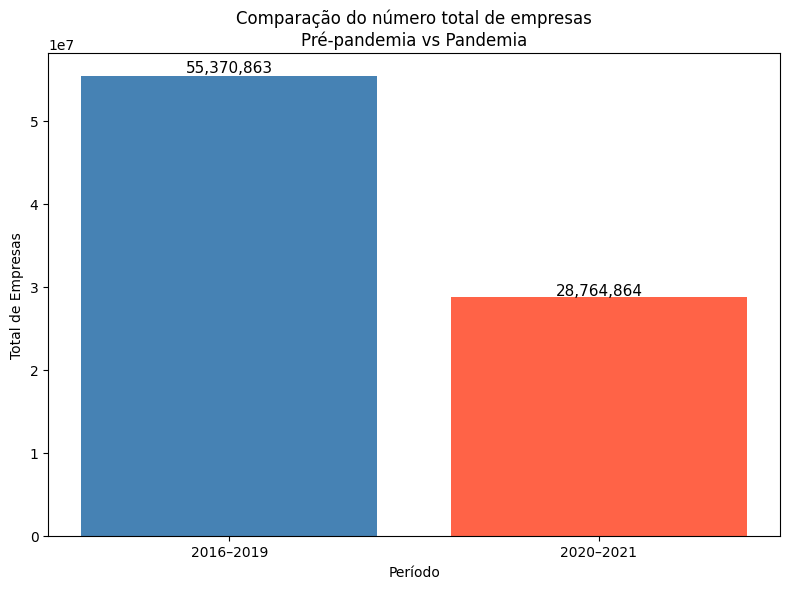

<ipython-input-37-7844287f6db0>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_empresas_ano, x='Ano', y='QtEmpresas', palette='mako')


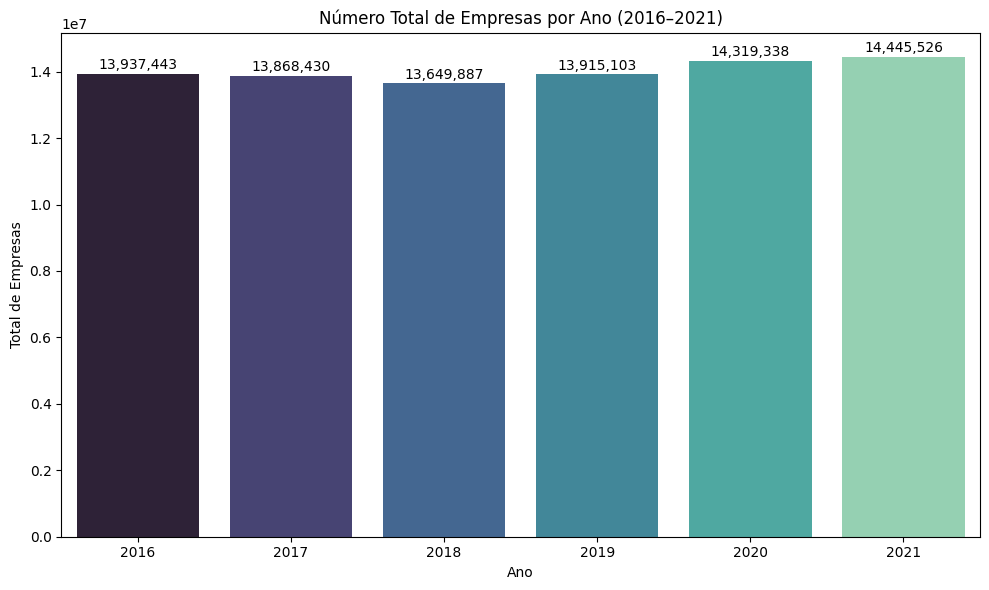

In [37]:
coluna_empresas = 'QtEmpresas'
coluna_ano = 'Ano'

df_br[coluna_empresas] = pd.to_numeric(df_br[coluna_empresas], errors='coerce')
df_br[coluna_ano] = pd.to_numeric(df_br[coluna_ano], errors='coerce')

total_pre_pandemia = df_br[df_br[coluna_ano].between(2016, 2019)][coluna_empresas].sum()
total_pandemia = df_br[df_br[coluna_ano].between(2020, 2021)][coluna_empresas].sum()

diferenca = total_pandemia - total_pre_pandemia

if diferenca > 0:
    conclusao = "Teve aumento no número total de empresas entre 2020 e 2021 em comparação com 2016 a 2019."
elif diferenca < 0:
    conclusao = "Teve redução no número total de empresas entre 2020 e 2021 em comparação com 2016 a 2019."
else:
    conclusao = "Nada mudou."

print(f"Total de empresas (2016–2019): {total_pre_pandemia}")
print(f"Total de empresas (2020–2021): {total_pandemia}")
print(f"Diferença no número total de empresas: {abs(diferenca)}")
print(conclusao)

# Gráficos
periodos = ['2016–2019', '2020–2021']
valores = [total_pre_pandemia, total_pandemia]

plt.figure(figsize=(8, 6))
plt.bar(periodos, valores, color=['steelblue', 'tomato'])
plt.title("Comparação do número total de empresas\nPré-pandemia vs Pandemia")
plt.ylabel("Total de Empresas")
plt.xlabel("Período")
for i, v in enumerate(valores):
    plt.text(i, v + (v * 0.01), f'{int(v):,}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

df_empresas_ano = df_br[df_br['Ano'].between(2016, 2021)].groupby('Ano')['QtEmpresas'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_empresas_ano, x='Ano', y='QtEmpresas', palette='mako')
plt.title('Número Total de Empresas por Ano (2016–2021)')
plt.ylabel('Total de Empresas')
plt.xlabel('Ano')
for index, row in df_empresas_ano.iterrows():
    plt.text(index, row['QtEmpresas'] + (row['QtEmpresas'] * 0.01), f'{int(row["QtEmpresas"]):,}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


##Pergunta 03

Soma dos maiores valores de produção por cidade (2016–2019): R$ 9,302,343.00
Soma dos maiores valores de produção por cidade (2020–2021): R$ 10,505,480.00


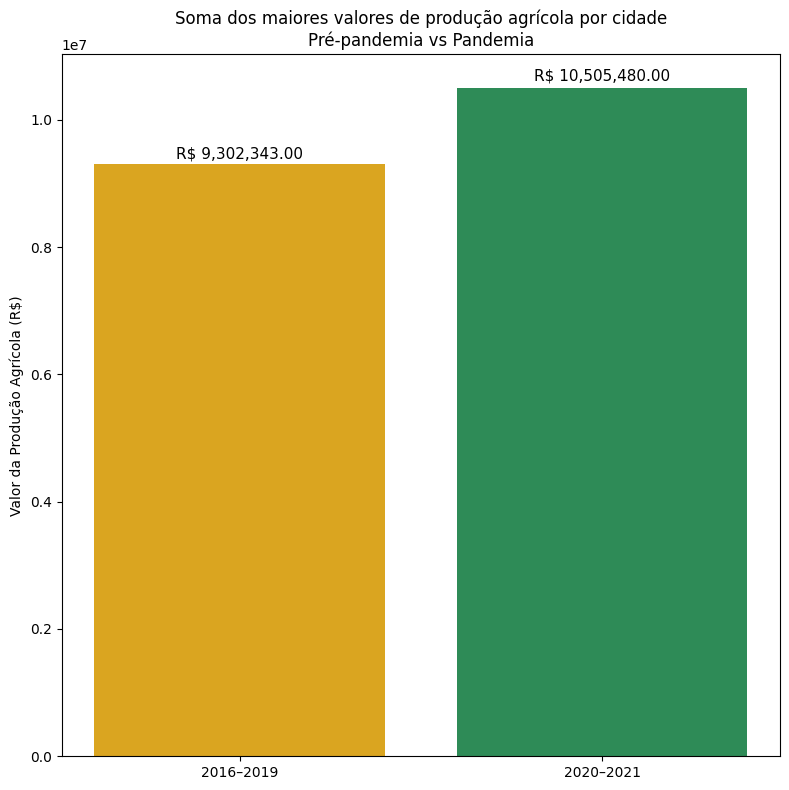

In [38]:
df_br["VlProducaoAgricola"] = pd.to_numeric(df_br["VlProducaoAgricola"], errors='coerce')

df_pre_pandemia = df_br[df_br["Ano"].between(2016, 2019)]
df_pandemia = df_br[df_br["Ano"].between(2020, 2021)]

max_por_cidade_pre = df_pre_pandemia.groupby("Municipio")["VlProducaoAgricola"].max()
max_por_cidade_pand = df_pandemia.groupby("Municipio")["VlProducaoAgricola"].max()

soma_pre = max_por_cidade_pre.sum()
soma_pand = max_por_cidade_pand.sum()

print(f"Soma dos maiores valores de produção por cidade (2016–2019): R$ {soma_pre:,.2f}")
print(f"Soma dos maiores valores de produção por cidade (2020–2021): R$ {soma_pand:,.2f}")

# Gráfico
periodos = ['2016–2019', '2020–2021']
valores = [soma_pre, soma_pand]

plt.figure(figsize=(8, 8))
plt.bar(periodos, valores, color=['goldenrod', 'seagreen'])
plt.title("Soma dos maiores valores de produção agrícola por cidade\nPré-pandemia vs Pandemia")
plt.ylabel("Valor da Produção Agrícola (R$)")
for i, v in enumerate(valores):
    plt.text(i, v + (v * 0.01), f'R$ {v:,.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

##Pergunta 04


##Pergunta 05

##Pergunta 06

PIB 2018: R$ 4,807,114,145.00
PIB 2019: R$ 5,110,479,942.00
Crescimento 2018–2019: R$ 303,365,797.00 (6.31%)
PIB 2020: R$ 5,050,785,431.00
Crescimento 2019–2020: R$ -59,694,511.00 (-1.18%)


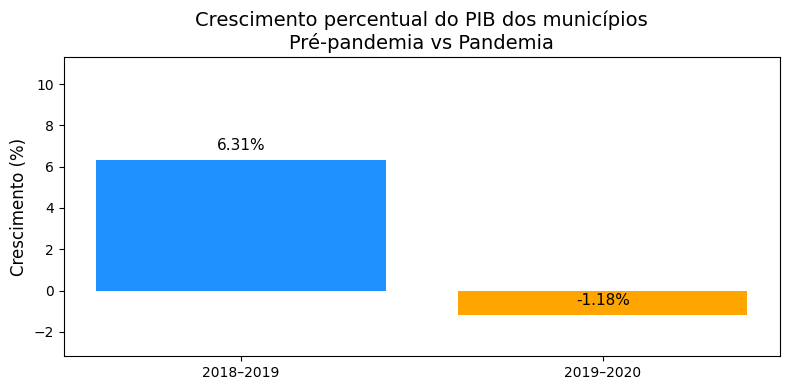

In [49]:

df_br["PIB"] = pd.to_numeric(df_br["PIB"], errors="coerce")

pib_2018 = df_br[df_br["Ano"] == 2018]["PIB"].sum(skipna=True)
pib_2019 = df_br[df_br["Ano"] == 2019]["PIB"].sum(skipna=True)
pib_2020 = df_br[df_br["Ano"] == 2020]["PIB"].sum(skipna=True)

crescimento_pre = pib_2019 - pib_2018
crescimento_pand = pib_2020 - pib_2019

perc_pre = (crescimento_pre / pib_2018) * 100 if pib_2018 != 0 else 0
perc_pand = (crescimento_pand / pib_2020) * 100 if pib_2020 != 0 else 0

print(f"PIB 2018: R$ {pib_2018:,.2f}")
print(f"PIB 2019: R$ {pib_2019:,.2f}")
print(f"Crescimento 2018–2019: R$ {crescimento_pre:,.2f} ({perc_pre:.2f}%)")

print(f"PIB 2020: R$ {pib_2020:,.2f}")
print(f"Crescimento 2019–2020: R$ {crescimento_pand:,.2f} ({perc_pand:.2f}%)")

plt.figure(figsize=(8, 4))

periodos = ["2018–2019"]
valores = [perc_pre]
cores = ["dodgerblue"]

if perc_pand is not None:
    periodos.append("2019–2020")
    valores.append(perc_pand)
    cores.append("orange")

barras = plt.bar(periodos, valores, color=cores)
plt.title("Crescimento percentual do PIB dos municípios\nPré-pandemia vs Pandemia", fontsize=14)
plt.ylabel("Crescimento (%)", fontsize=12)

for barra in barras:
    altura = barra.get_height()
    texto = f"{altura:.2f}%"
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.5, texto, ha='center', fontsize=11)

plt.ylim(min(valores + [0]) - 2, max(valores + [0]) + 5)
plt.tight_layout()
plt.show()



##Pergunta 07

##Pergunta 08

<ipython-input-50-5e528c71ab5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Razao_Area'] = df_filtered['AreaColhida_h'] / df_filtered['AreaPlantada_h']
<ipython-input-50-5e528c71ab5f>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_area_plantada = df_filtered.groupby('Ano').apply(lambda x: x.nlargest(5, 'AreaPlantada_h')).reset_index(drop=True)


Top 5 cidades com menor razão entre AreaPlantada e AreaColhida e suas Produções Agrícolas:
     Ano               Municipio  Razao_Area  VlProducaoAgricola
0   2016             Paragominas    1.000000                6810
1   2016               Cruz Alta    1.000000                3040
2   2016            Santa Carmem    0.817814                9630
3   2016             Paranatinga    1.000000                6890
4   2016            Nova Ubiratã    0.876416                5019
5   2017   São Félix do Araguaia    1.000000                7170
6   2017            Aral Moreira    1.000000                2590
7   2017        Tangará da Serra    1.000000                7540
8   2017                Canarana    1.000000                7730
9   2017         Campos de Júlio    0.585492                 430
10  2018                 Amambaí    1.000000                5870
11  2018        Novo São Joaquim    1.000000                8970
12  2018  Santo Antônio do Leste    1.000000                8590

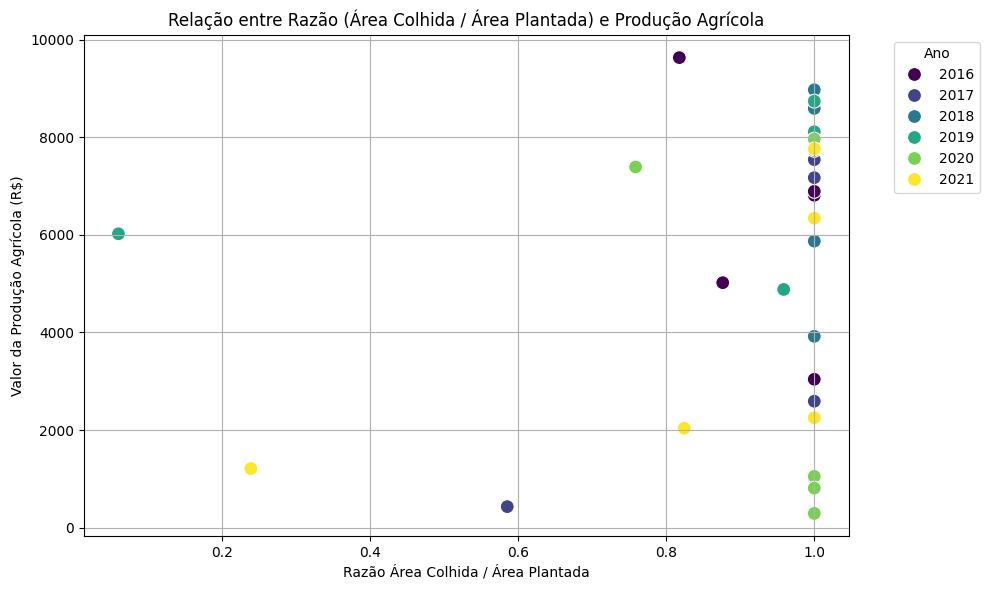

In [50]:
df_filtered = df_br[(df_br['AreaPlantada_h'] > 0) & (df_br['AreaColhida_h'] > 0) & (df_br['VlProducaoAgricola'] > 0)]
df_filtered['Razao_Area'] = df_filtered['AreaColhida_h'] / df_filtered['AreaPlantada_h']

# Para cada ano, pegar as 5 cidades com maior valor em AreaPlantada_h
top_5_area_plantada = df_filtered.groupby('Ano').apply(lambda x: x.nlargest(5, 'AreaPlantada_h')).reset_index(drop=True)

# Calcular a razão entre Área Colhida e Área Plantada para essas cidades
top_5_area_plantada['Razao_Area'] = top_5_area_plantada['AreaColhida_h'] / top_5_area_plantada['AreaPlantada_h']

# Exibir as cidades e suas respectivas Produções Agrícolas
print("Top 5 cidades com menor razão entre AreaPlantada e AreaColhida e suas Produções Agrícolas:")
print(top_5_area_plantada[['Ano', 'Municipio', 'Razao_Area', 'VlProducaoAgricola']])


# Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_5_area_plantada, x='Razao_Area', y='VlProducaoAgricola', hue='Ano', palette='viridis', s=100)

plt.title('Relação entre Razão (Área Colhida / Área Plantada) e Produção Agrícola')
plt.xlabel('Razão Área Colhida / Área Plantada')
plt.ylabel('Valor da Produção Agrícola (R$)')
plt.grid(True)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Pergunta 08 (Outra Versão)

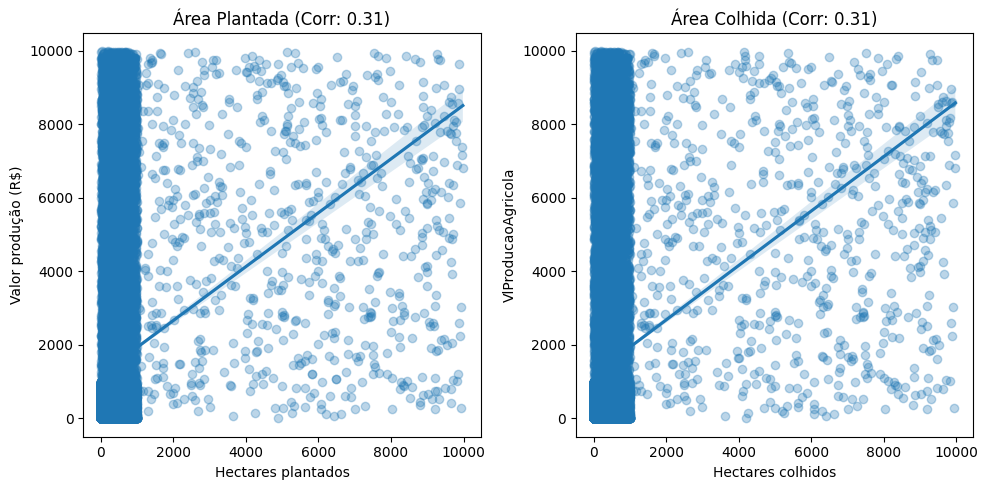


Correlação Área Plantada x Valor Produção: 0.31
Correlação Área Colhida x Valor Produção: 0.31

Conclusão: Relação fraca - a área não é o principal determinante do valor


In [51]:
# 1. Cálculo de correlações
corr_plantada = df_br['AreaPlantada_h'].corr(df_br['VlProducaoAgricola'])
corr_colhida = df_br['AreaColhida_h'].corr(df_br['VlProducaoAgricola'])

# 2. Gráfico combinado
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='AreaPlantada_h', y='VlProducaoAgricola', data=df_br, scatter_kws={'alpha':0.3})
plt.title(f'Área Plantada (Corr: {corr_plantada:.2f})')
plt.xlabel('Hectares plantados')
plt.ylabel('Valor produção (R$)')

plt.subplot(1, 2, 2)
sns.regplot(x='AreaColhida_h', y='VlProducaoAgricola', data=df_br, scatter_kws={'alpha':0.3})
plt.title(f'Área Colhida (Corr: {corr_colhida:.2f})')
plt.xlabel('Hectares colhidos')

plt.tight_layout()
plt.show()

# 3. Saída numérica
print(f"\nCorrelação Área Plantada x Valor Produção: {corr_plantada:.2f}")
print(f"Correlação Área Colhida x Valor Produção: {corr_colhida:.2f}")

if corr_colhida > 0.7:
    print("\nConclusão: Há forte relação direta entre área e valor da produção")
elif corr_colhida > 0.4:
    print("\nConclusão: Relação moderada - outros fatores também influenciam")
else:
    print("\nConclusão: Relação fraca - a área não é o principal determinante do valor")


##Pergunta 09

<ipython-input-52-734b056ed8f3>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_exportacoes_5 = top_exportacoes.groupby('Ano').apply(lambda x: x.nlargest(5, 'Exportacoes_US$')).reset_index(drop=True)
<ipython-input-52-734b056ed8f3>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_receitas_5 = top_receitas.groupby('Ano').apply(lambda x: x.nlargest(5, 'Receitas_R$')).reset_index(drop=True)
<ipython-

Top 5 cidades por Exportações e suas Receitas:
     Ano       Municipio  Exportacoes_US$   Receitas_R$
0   2016       São Paulo     9.042182e+09  5.433282e+10
1   2016          Itajaí     4.415417e+09  1.381083e+09
2   2016  Rio de Janeiro     3.933208e+09  2.934882e+10
3   2016        Paulínia     2.872113e+09  1.479559e+09
4   2016        Camaçari     2.529808e+09  1.268266e+09
5   2017       São Paulo     1.006167e+10  5.761756e+10
6   2017  Rio de Janeiro     4.187085e+09  2.454225e+10
7   2017        Paulínia     2.995507e+09  1.542410e+09
8   2017        Campinas     2.733103e+09  4.837631e+09
9   2017           Serra     1.936688e+09  1.242732e+09
10  2018       São Paulo     1.049448e+10  5.668220e+10
11  2018  Rio de Janeiro     9.046463e+09  2.550691e+10
12  2018           Macaé     7.620277e+09  2.620953e+09
13  2018         Ipojuca     3.146793e+09  8.988477e+08
14  2018        Campinas     3.122106e+09  5.159492e+09
15  2019       São Paulo     1.009334e+10  6.485309e+10
1

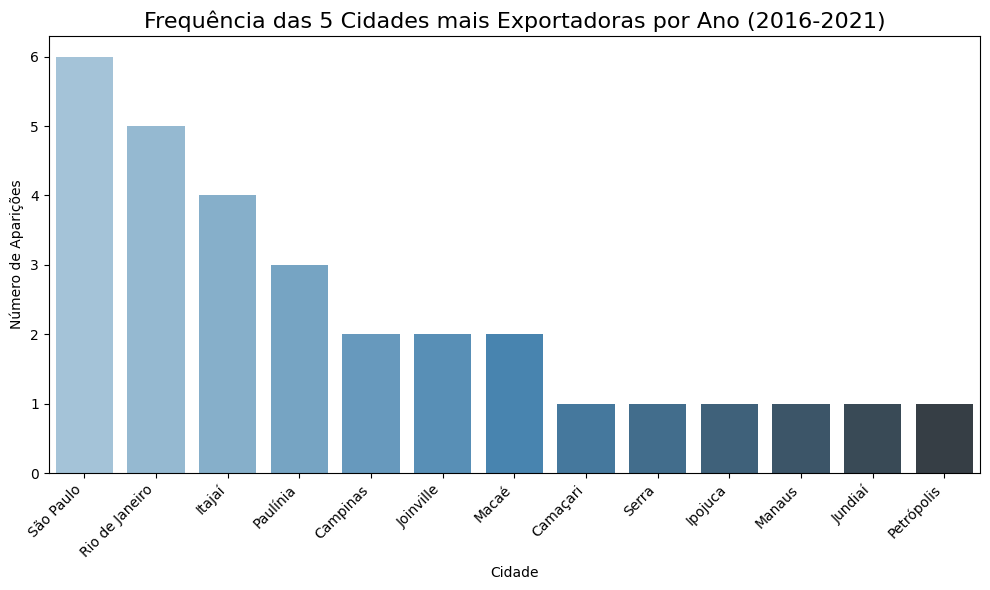

<ipython-input-52-734b056ed8f3>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_receitas_freq.index, y=city_receitas_freq.values, palette='Greens_d')


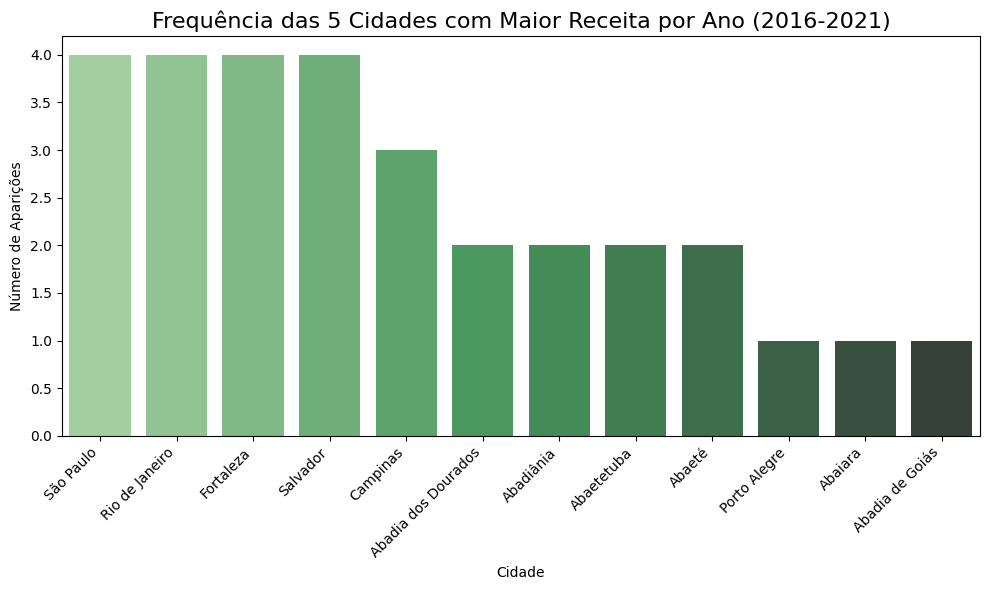

In [52]:
df = df_br[df_br['Ano'].between(2016, 2021)]

# Etapa 1: 5 cidades com maior valor de Exportações (US$) para cada ano e seus valores de Receitas (R$)
top_exportacoes = df_br.groupby(['Ano', 'Municipio'])[['Exportacoes_US$', 'Receitas_R$']].sum().reset_index()

top_exportacoes_5 = top_exportacoes.groupby('Ano').apply(lambda x: x.nlargest(5, 'Exportacoes_US$')).reset_index(drop=True)

city_export_freq = top_exportacoes_5['Municipio'].value_counts()

# Etapa 2: 5 cidades com maior valor de Receitas (R$) para cada ano e seus valores de Exportações (US$)
top_receitas = df.groupby(['Ano', 'Municipio'])[['Receitas_R$', 'Exportacoes_US$']].sum().reset_index()

top_receitas_5 = top_receitas.groupby('Ano').apply(lambda x: x.nlargest(5, 'Receitas_R$')).reset_index(drop=True)

city_receitas_freq = top_receitas_5['Municipio'].value_counts()

# Exibindo os dois dataframes
print("Top 5 cidades por Exportações e suas Receitas:")
print(top_exportacoes_5[['Ano', 'Municipio', 'Exportacoes_US$', 'Receitas_R$']])

print("\nTop 5 cidades por Receitas e suas Exportações:")
print(top_receitas_5[['Ano', 'Municipio', 'Receitas_R$', 'Exportacoes_US$']])


## Plotando os gráficos
#Frequencia das cidades que mais exportam
plt.figure(figsize=(10, 6))
sns.barplot(x=city_export_freq.index, y=city_export_freq.values, palette='Blues_d')
plt.title('Frequência das 5 Cidades mais Exportadoras por Ano (2016-2021)', fontsize=16)
plt.xlabel('Cidade')
plt.ylabel('Número de Aparições')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_receitas_freq.index, y=city_receitas_freq.values, palette='Greens_d')
plt.title('Frequência das 5 Cidades com Maior Receita por Ano (2016-2021)', fontsize=16)
plt.xlabel('Cidade')
plt.ylabel('Número de Aparições')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Pergunta 10

<ipython-input-53-0a5e1acc1cc5>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fluxos_melt, x='Regiao', y='Valor', hue='Ano', ci=None, palette='viridis', dodge=True)


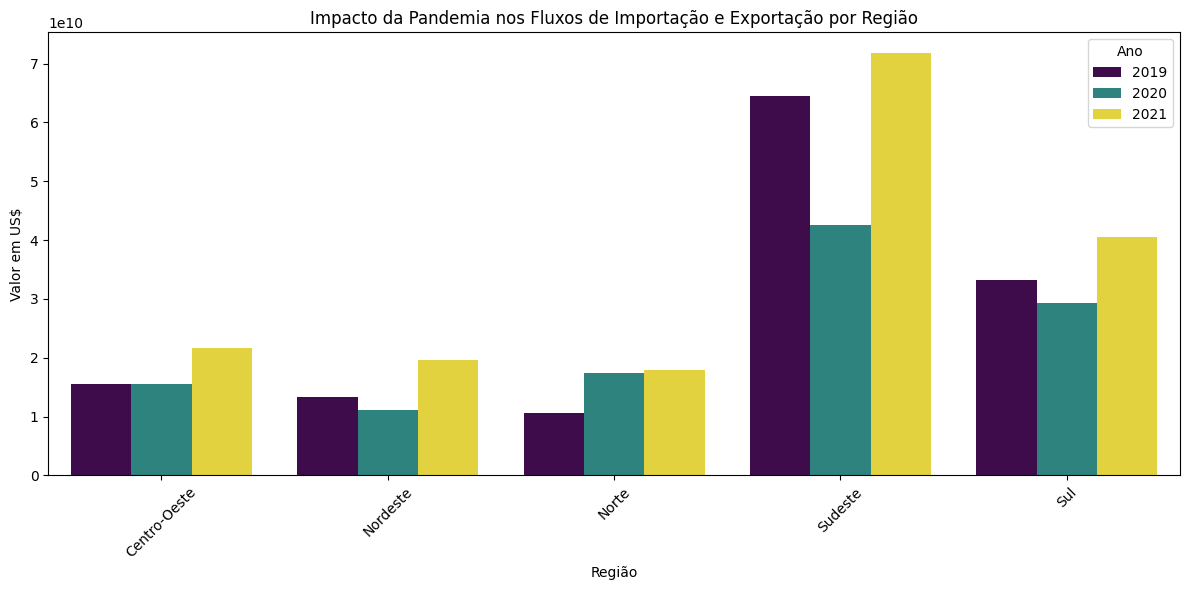

In [53]:
colunas_convert = ['Importacoes_US$', 'Exportacoes_US$', 'Ano']
for col in colunas_convert:
    df_br[col] = df_br[col].replace({'-': None, ',': '', '\.': ''}, regex=True)
    df_br[col] = pd.to_numeric(df_br[col], errors='coerce')

df_pandemia = df_br[df_br['Ano'].isin([2019, 2020, 2021])]

fluxos = df_pandemia.groupby(['Ano', 'Regiao'])[['Importacoes_US$', 'Exportacoes_US$']].sum().reset_index()

fluxos_melt = fluxos.melt(
    id_vars=['Ano', 'Regiao'],
    value_vars=['Importacoes_US$', 'Exportacoes_US$'],
    var_name='Tipo', value_name='Valor'
)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=fluxos_melt, x='Regiao', y='Valor', hue='Ano', ci=None, palette='viridis', dodge=True)
plt.title('Impacto da Pandemia nos Fluxos de Importação e Exportação por Região')
plt.ylabel('Valor em US$')
plt.xlabel('Região')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

##Pergunta 11

##Pergunta 12

##Pergunta 13


##Pergunta 14